In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
# import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML
from sklearn.metrics import accuracy_score, classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
arrivals_df = pd.read_csv('./arrivals.csv',index_col=0)

## EDA on Arrivals Dataset 

In [3]:
arrivals_df

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Destination Airport
0,UA,01/01/2022,1282,N4901U,IAD,23:10,00:01,70,76,51,23:55,6,23,0,6,0,22,SYR
1,UA,01/01/2023,604,N814UA,DEN,14:58,14:52,193,177,-6,14:48,4,0,0,0,0,0,SYR
2,UA,01/01/2023,2488,N38458,EWR,23:14,23:15,75,62,1,23:10,5,0,0,0,0,0,SYR
3,UA,01/01/2023,2645,N23721,ORD,23:57,23:47,107,100,-10,23:41,6,0,0,0,0,0,SYR
4,UA,01/02/2022,1282,N4901U,IAD,23:10,23:27,70,64,17,23:19,8,17,0,0,0,0,SYR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69503,EV,12/16/2019,3977,N16976,EWR,13:21,14:06,74,61,45,14:01,5,45,0,0,0,0,SYR
69504,EV,12/17/2019,3977,N13978,EWR,13:21,13:53,74,113,32,13:41,12,0,0,32,0,0,SYR
69505,EV,12/18/2019,3977,N26545,EWR,13:21,14:46,74,76,85,14:37,9,83,0,2,0,0,SYR
69506,EV,12/22/2019,4388,N13903,EWR,23:13,23:06,76,67,-7,23:00,6,0,0,0,0,0,SYR


In [4]:
arrivals_df.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Destination Airport
0,UA,01/01/2022,1282,N4901U,IAD,23:10,00:01,70,76,51,23:55,6,23,0,6,0,22,SYR
1,UA,01/01/2023,604,N814UA,DEN,14:58,14:52,193,177,-6,14:48,4,0,0,0,0,0,SYR
2,UA,01/01/2023,2488,N38458,EWR,23:14,23:15,75,62,1,23:10,5,0,0,0,0,0,SYR
3,UA,01/01/2023,2645,N23721,ORD,23:57,23:47,107,100,-10,23:41,6,0,0,0,0,0,SYR
4,UA,01/02/2022,1282,N4901U,IAD,23:10,23:27,70,64,17,23:19,8,17,0,0,0,0,SYR


In [5]:
arrivals_df.tail()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Destination Airport
69503,EV,12/16/2019,3977,N16976,EWR,13:21,14:06,74,61,45,14:01,5,45,0,0,0,0,SYR
69504,EV,12/17/2019,3977,N13978,EWR,13:21,13:53,74,113,32,13:41,12,0,0,32,0,0,SYR
69505,EV,12/18/2019,3977,N26545,EWR,13:21,14:46,74,76,85,14:37,9,83,0,2,0,0,SYR
69506,EV,12/22/2019,4388,N13903,EWR,23:13,23:06,76,67,-7,23:00,6,0,0,0,0,0,SYR
69507,EV,12/30/2019,3205,N14902,EWR,18:18,18:09,79,79,-9,18:04,5,0,0,0,0,0,SYR


In [6]:
arrivals_df.columns

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Origin Airport', 'Scheduled Arrival Time', 'Actual Arrival Time',
       'Scheduled Elapsed Time (Minutes)', 'Actual Elapsed Time (Minutes)',
       'Arrival Delay (Minutes)', 'Wheels-on Time', 'Taxi-In time (Minutes)',
       'Delay Carrier (Minutes)', 'Delay Weather (Minutes)',
       'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)',
       'Delay Late Aircraft Arrival (Minutes)', 'Destination Airport'],
      dtype='object')

In [7]:
arrivals_df.shape

(69508, 18)

In [8]:
arrivals_df.dtypes

Carrier Code                                object
Date (MM/DD/YYYY)                           object
Flight Number                                int64
Tail Number                                 object
Origin Airport                              object
Scheduled Arrival Time                      object
Actual Arrival Time                         object
Scheduled Elapsed Time (Minutes)             int64
Actual Elapsed Time (Minutes)                int64
Arrival Delay (Minutes)                      int64
Wheels-on Time                              object
Taxi-In time (Minutes)                       int64
Delay Carrier (Minutes)                      int64
Delay Weather (Minutes)                      int64
Delay National Aviation System (Minutes)     int64
Delay Security (Minutes)                     int64
Delay Late Aircraft Arrival (Minutes)        int64
Destination Airport                         object
dtype: object

In [9]:
arrivals_df.isna().sum()

Carrier Code                                  0
Date (MM/DD/YYYY)                             0
Flight Number                                 0
Tail Number                                 457
Origin Airport                                0
Scheduled Arrival Time                        0
Actual Arrival Time                           0
Scheduled Elapsed Time (Minutes)              0
Actual Elapsed Time (Minutes)                 0
Arrival Delay (Minutes)                       0
Wheels-on Time                                0
Taxi-In time (Minutes)                        0
Delay Carrier (Minutes)                       0
Delay Weather (Minutes)                       0
Delay National Aviation System (Minutes)      0
Delay Security (Minutes)                      0
Delay Late Aircraft Arrival (Minutes)         0
Destination Airport                           0
dtype: int64

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

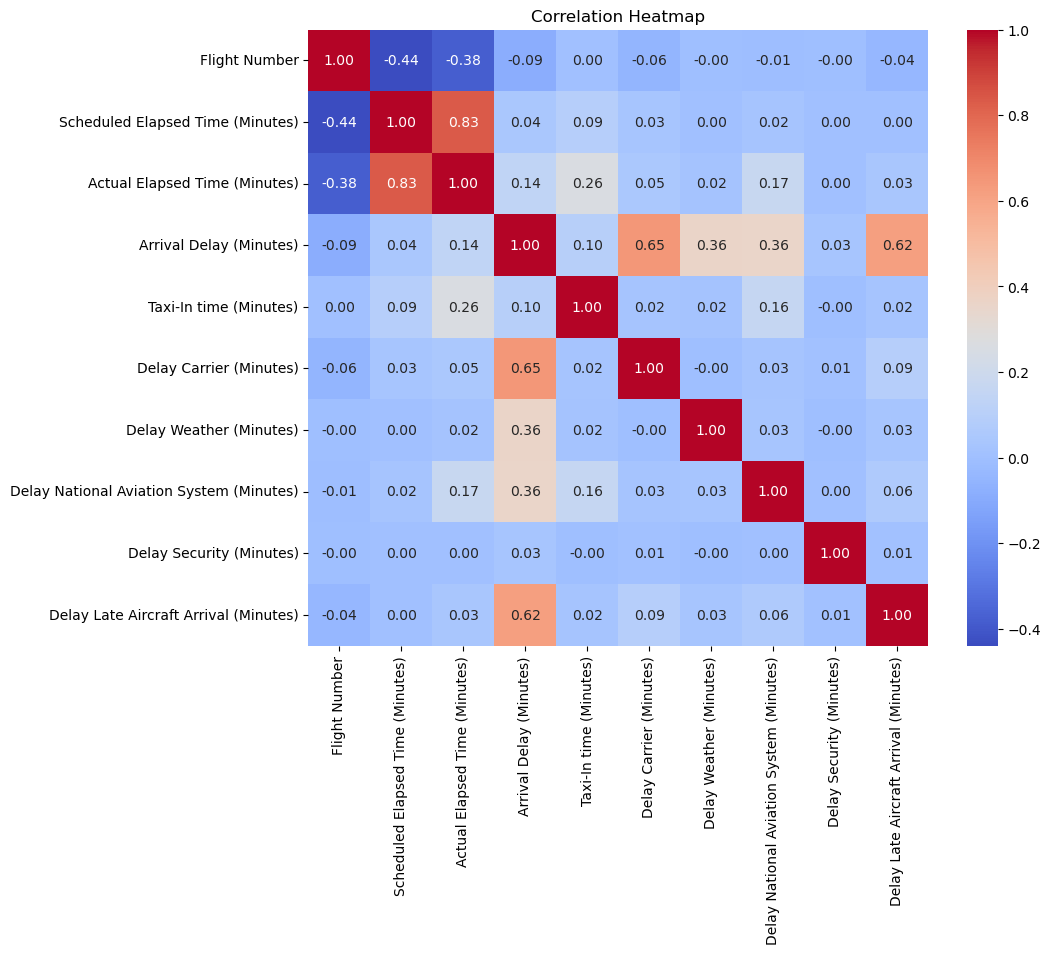

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = arrivals_df.corr(numeric_only=True)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [11]:
arr_df = arrivals_df.copy()

In [12]:
arr_df

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Destination Airport
0,UA,01/01/2022,1282,N4901U,IAD,23:10,00:01,70,76,51,23:55,6,23,0,6,0,22,SYR
1,UA,01/01/2023,604,N814UA,DEN,14:58,14:52,193,177,-6,14:48,4,0,0,0,0,0,SYR
2,UA,01/01/2023,2488,N38458,EWR,23:14,23:15,75,62,1,23:10,5,0,0,0,0,0,SYR
3,UA,01/01/2023,2645,N23721,ORD,23:57,23:47,107,100,-10,23:41,6,0,0,0,0,0,SYR
4,UA,01/02/2022,1282,N4901U,IAD,23:10,23:27,70,64,17,23:19,8,17,0,0,0,0,SYR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69503,EV,12/16/2019,3977,N16976,EWR,13:21,14:06,74,61,45,14:01,5,45,0,0,0,0,SYR
69504,EV,12/17/2019,3977,N13978,EWR,13:21,13:53,74,113,32,13:41,12,0,0,32,0,0,SYR
69505,EV,12/18/2019,3977,N26545,EWR,13:21,14:46,74,76,85,14:37,9,83,0,2,0,0,SYR
69506,EV,12/22/2019,4388,N13903,EWR,23:13,23:06,76,67,-7,23:00,6,0,0,0,0,0,SYR


In [13]:
arr_df.drop_duplicates(inplace=True)

In [14]:
arr_df

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Destination Airport
0,UA,01/01/2022,1282,N4901U,IAD,23:10,00:01,70,76,51,23:55,6,23,0,6,0,22,SYR
1,UA,01/01/2023,604,N814UA,DEN,14:58,14:52,193,177,-6,14:48,4,0,0,0,0,0,SYR
2,UA,01/01/2023,2488,N38458,EWR,23:14,23:15,75,62,1,23:10,5,0,0,0,0,0,SYR
3,UA,01/01/2023,2645,N23721,ORD,23:57,23:47,107,100,-10,23:41,6,0,0,0,0,0,SYR
4,UA,01/02/2022,1282,N4901U,IAD,23:10,23:27,70,64,17,23:19,8,17,0,0,0,0,SYR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69048,WN,12/31/2022,2495,N8689C,BWI,22:15,22:37,70,55,22,22:34,3,22,0,0,0,0,SYR
69049,WN,12/31/2023,954,N958WN,BWI,16:05,16:06,70,62,1,16:04,2,0,0,0,0,0,SYR
69050,WN,12/31/2023,1894,N8699A,BWI,22:40,22:59,70,62,19,22:57,2,19,0,0,0,0,SYR
69051,WN,12/31/2023,2169,N1801U,BWI,12:35,12:26,80,69,-9,12:22,4,0,0,0,0,0,SYR


In [15]:
arr_df.drop(columns=['Tail Number','Destination Airport'],inplace=True)

arr_df.reset_index(drop=True, inplace=True)

In [16]:
arr_df

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,UA,01/01/2022,1282,IAD,23:10,00:01,70,76,51,23:55,6,23,0,6,0,22
1,UA,01/01/2023,604,DEN,14:58,14:52,193,177,-6,14:48,4,0,0,0,0,0
2,UA,01/01/2023,2488,EWR,23:14,23:15,75,62,1,23:10,5,0,0,0,0,0
3,UA,01/01/2023,2645,ORD,23:57,23:47,107,100,-10,23:41,6,0,0,0,0,0
4,UA,01/02/2022,1282,IAD,23:10,23:27,70,64,17,23:19,8,17,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56538,WN,12/31/2022,2495,BWI,22:15,22:37,70,55,22,22:34,3,22,0,0,0,0
56539,WN,12/31/2023,954,BWI,16:05,16:06,70,62,1,16:04,2,0,0,0,0,0
56540,WN,12/31/2023,1894,BWI,22:40,22:59,70,62,19,22:57,2,19,0,0,0,0
56541,WN,12/31/2023,2169,BWI,12:35,12:26,80,69,-9,12:22,4,0,0,0,0,0


In [17]:
arr_df.isna().sum()

Carrier Code                                0
Date (MM/DD/YYYY)                           0
Flight Number                               0
Origin Airport                              0
Scheduled Arrival Time                      0
Actual Arrival Time                         0
Scheduled Elapsed Time (Minutes)            0
Actual Elapsed Time (Minutes)               0
Arrival Delay (Minutes)                     0
Wheels-on Time                              0
Taxi-In time (Minutes)                      0
Delay Carrier (Minutes)                     0
Delay Weather (Minutes)                     0
Delay National Aviation System (Minutes)    0
Delay Security (Minutes)                    0
Delay Late Aircraft Arrival (Minutes)       0
dtype: int64

In [18]:
arr_df = arr_df[arr_df['Origin Airport'].isin(['ORD', 'JFK', 'MCO'])]

arr_df.reset_index(drop=True, inplace=True)

In [19]:
arr_df.shape

(17464, 16)

In [20]:
arr_df["Actual Arrival Time"] = arr_df["Actual Arrival Time"].apply(lambda x: "00"+x[2:] if x[:2]=="24" else x)
arr_df["scheduled_time"] = arr_df["Date (MM/DD/YYYY)"] + ' '+ arr_df["Scheduled Arrival Time"]
arr_df["actual_time"] = arr_df["Date (MM/DD/YYYY)"] + ' ' + arr_df["Actual Arrival Time"]
arr_df

/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_75036/2662353145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr_df["Actual Arrival Time"] = arr_df["Actual Arrival Time"].apply(lambda x: "00"+x[2:] if x[:2]=="24" else x)
/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_75036/2662353145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr_df["scheduled_time"] = arr_df["Date (MM/DD/YYYY)"] + ' '+ arr_df["Scheduled Arrival Time"]
/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),scheduled_time,actual_time
0,UA,01/01/2023,2645,ORD,23:57,23:47,107,100,-10,23:41,6,0,0,0,0,0,01/01/2023 23:57,01/01/2023 23:47
1,UA,01/02/2023,1998,ORD,21:07,20:46,113,89,-21,20:43,3,0,0,0,0,0,01/02/2023 21:07,01/02/2023 20:46
2,UA,01/03/2023,1998,ORD,21:07,21:04,113,111,-3,20:58,6,0,0,0,0,0,01/03/2023 21:07,01/03/2023 21:04
3,UA,01/04/2023,1998,ORD,21:17,21:31,113,110,14,21:26,5,0,0,0,0,0,01/04/2023 21:17,01/04/2023 21:31
4,UA,01/05/2020,2012,ORD,21:47,21:55,107,94,8,21:50,5,0,0,0,0,0,01/05/2020 21:47,01/05/2020 21:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17459,WN,12/28/2023,3149,MCO,13:00,13:08,160,147,8,13:05,3,0,0,0,0,0,12/28/2023 13:00,12/28/2023 13:08
17460,WN,12/29/2023,3149,MCO,13:00,12:46,160,150,-14,12:43,3,0,0,0,0,0,12/29/2023 13:00,12/29/2023 12:46
17461,WN,12/30/2023,3208,MCO,12:30,12:23,160,157,-7,12:14,9,0,0,0,0,0,12/30/2023 12:30,12/30/2023 12:23
17462,WN,12/31/2022,1149,MCO,14:05,14:12,160,147,7,14:10,2,0,0,0,0,0,12/31/2022 14:05,12/31/2022 14:12


In [21]:
arr_df["scheduled_time"] = pd.to_datetime(arr_df["scheduled_time"], format="%m/%d/%Y %H:%M")
arr_df["actual_time"] = pd.to_datetime(arr_df["actual_time"], format="%m/%d/%Y %H:%M")
arr_df["date"] = arr_df["actual_time"].dt.date
arr_df

/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_75036/1293684851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr_df["scheduled_time"] = pd.to_datetime(arr_df["scheduled_time"], format="%m/%d/%Y %H:%M")
/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_75036/1293684851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr_df["actual_time"] = pd.to_datetime(arr_df["actual_time"], format="%m/%d/%Y %H:%M")
/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_75036/1293684851.

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),scheduled_time,actual_time,date
0,UA,01/01/2023,2645,ORD,23:57,23:47,107,100,-10,23:41,6,0,0,0,0,0,2023-01-01 23:57:00,2023-01-01 23:47:00,2023-01-01
1,UA,01/02/2023,1998,ORD,21:07,20:46,113,89,-21,20:43,3,0,0,0,0,0,2023-01-02 21:07:00,2023-01-02 20:46:00,2023-01-02
2,UA,01/03/2023,1998,ORD,21:07,21:04,113,111,-3,20:58,6,0,0,0,0,0,2023-01-03 21:07:00,2023-01-03 21:04:00,2023-01-03
3,UA,01/04/2023,1998,ORD,21:17,21:31,113,110,14,21:26,5,0,0,0,0,0,2023-01-04 21:17:00,2023-01-04 21:31:00,2023-01-04
4,UA,01/05/2020,2012,ORD,21:47,21:55,107,94,8,21:50,5,0,0,0,0,0,2020-01-05 21:47:00,2020-01-05 21:55:00,2020-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17459,WN,12/28/2023,3149,MCO,13:00,13:08,160,147,8,13:05,3,0,0,0,0,0,2023-12-28 13:00:00,2023-12-28 13:08:00,2023-12-28
17460,WN,12/29/2023,3149,MCO,13:00,12:46,160,150,-14,12:43,3,0,0,0,0,0,2023-12-29 13:00:00,2023-12-29 12:46:00,2023-12-29
17461,WN,12/30/2023,3208,MCO,12:30,12:23,160,157,-7,12:14,9,0,0,0,0,0,2023-12-30 12:30:00,2023-12-30 12:23:00,2023-12-30
17462,WN,12/31/2022,1149,MCO,14:05,14:12,160,147,7,14:10,2,0,0,0,0,0,2022-12-31 14:05:00,2022-12-31 14:12:00,2022-12-31


## EDA on Departures Dataset

In [22]:
departures_df = pd.read_csv('./departures.csv',index_col=0)

In [23]:
departures_df

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Origin Airport
0,G4,01/02/2020,1737,241NV,SYR,06:30,06:29,176,167,-1,06:42,13,0,0,0,0,0,FLL
1,G4,01/03/2019,1720,226NV,SYR,06:50,06:49,182,167,-1,07:01,12,0,0,0,0,0,FLL
2,G4,01/03/2021,1744,245NV,SYR,16:25,17:40,178,168,75,17:53,13,0,0,0,0,65,FLL
3,G4,01/03/2022,962,222NV,SYR,06:15,06:15,176,175,0,06:30,15,0,0,0,0,0,FLL
4,G4,01/03/2023,523,234NV,SYR,06:30,10:34,182,170,244,10:51,17,232,0,0,0,0,FLL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56537,YX,12/16/2023,4312,N128HQ,SYR,19:45,19:39,213,198,-6,20:05,26,0,0,0,0,0,MIA
56538,YX,12/18/2021,5008,N127HQ,SYR,19:55,19:52,186,182,-3,20:10,18,0,0,0,0,0,MIA
56539,YX,12/23/2023,4371,N102HQ,SYR,19:44,19:42,206,187,-2,19:58,16,0,0,0,0,0,MIA
56540,YX,12/25/2021,5008,N425YX,SYR,19:55,19:49,186,194,-6,20:10,21,0,0,0,0,0,MIA


In [24]:
departures_df.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Origin Airport
0,G4,01/02/2020,1737,241NV,SYR,06:30,06:29,176,167,-1,06:42,13,0,0,0,0,0,FLL
1,G4,01/03/2019,1720,226NV,SYR,06:50,06:49,182,167,-1,07:01,12,0,0,0,0,0,FLL
2,G4,01/03/2021,1744,245NV,SYR,16:25,17:40,178,168,75,17:53,13,0,0,0,0,65,FLL
3,G4,01/03/2022,962,222NV,SYR,06:15,06:15,176,175,0,06:30,15,0,0,0,0,0,FLL
4,G4,01/03/2023,523,234NV,SYR,06:30,10:34,182,170,244,10:51,17,232,0,0,0,0,FLL


In [25]:
departures_df.tail()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Origin Airport
56537,YX,12/16/2023,4312,N128HQ,SYR,19:45,19:39,213,198,-6,20:05,26,0,0,0,0,0,MIA
56538,YX,12/18/2021,5008,N127HQ,SYR,19:55,19:52,186,182,-3,20:10,18,0,0,0,0,0,MIA
56539,YX,12/23/2023,4371,N102HQ,SYR,19:44,19:42,206,187,-2,19:58,16,0,0,0,0,0,MIA
56540,YX,12/25/2021,5008,N425YX,SYR,19:55,19:49,186,194,-6,20:10,21,0,0,0,0,0,MIA
56541,YX,12/30/2023,4371,N444YX,SYR,19:44,19:38,206,185,-6,19:58,20,0,0,0,0,0,MIA


In [26]:
dep_df = departures_df.copy()

In [27]:
dep_df

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Origin Airport
0,G4,01/02/2020,1737,241NV,SYR,06:30,06:29,176,167,-1,06:42,13,0,0,0,0,0,FLL
1,G4,01/03/2019,1720,226NV,SYR,06:50,06:49,182,167,-1,07:01,12,0,0,0,0,0,FLL
2,G4,01/03/2021,1744,245NV,SYR,16:25,17:40,178,168,75,17:53,13,0,0,0,0,65,FLL
3,G4,01/03/2022,962,222NV,SYR,06:15,06:15,176,175,0,06:30,15,0,0,0,0,0,FLL
4,G4,01/03/2023,523,234NV,SYR,06:30,10:34,182,170,244,10:51,17,232,0,0,0,0,FLL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56537,YX,12/16/2023,4312,N128HQ,SYR,19:45,19:39,213,198,-6,20:05,26,0,0,0,0,0,MIA
56538,YX,12/18/2021,5008,N127HQ,SYR,19:55,19:52,186,182,-3,20:10,18,0,0,0,0,0,MIA
56539,YX,12/23/2023,4371,N102HQ,SYR,19:44,19:42,206,187,-2,19:58,16,0,0,0,0,0,MIA
56540,YX,12/25/2021,5008,N425YX,SYR,19:55,19:49,186,194,-6,20:10,21,0,0,0,0,0,MIA


In [28]:
dep_df.isna().sum()

Carrier Code                                  0
Date (MM/DD/YYYY)                             0
Flight Number                                 0
Tail Number                                 407
Destination Airport                           0
Scheduled departure time                      0
Actual departure time                         0
Scheduled elapsed time (Minutes)              0
Actual elapsed time (Minutes)                 0
Departure delay (Minutes)                     0
Wheels-off time                               0
Taxi-Out time (Minutes)                       0
Delay Carrier (Minutes)                       0
Delay Weather (Minutes)                       0
Delay National Aviation System (Minutes)      0
Delay Security (Minutes)                      0
Delay Late Aircraft Arrival (Minutes)         0
Origin Airport                                0
dtype: int64

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

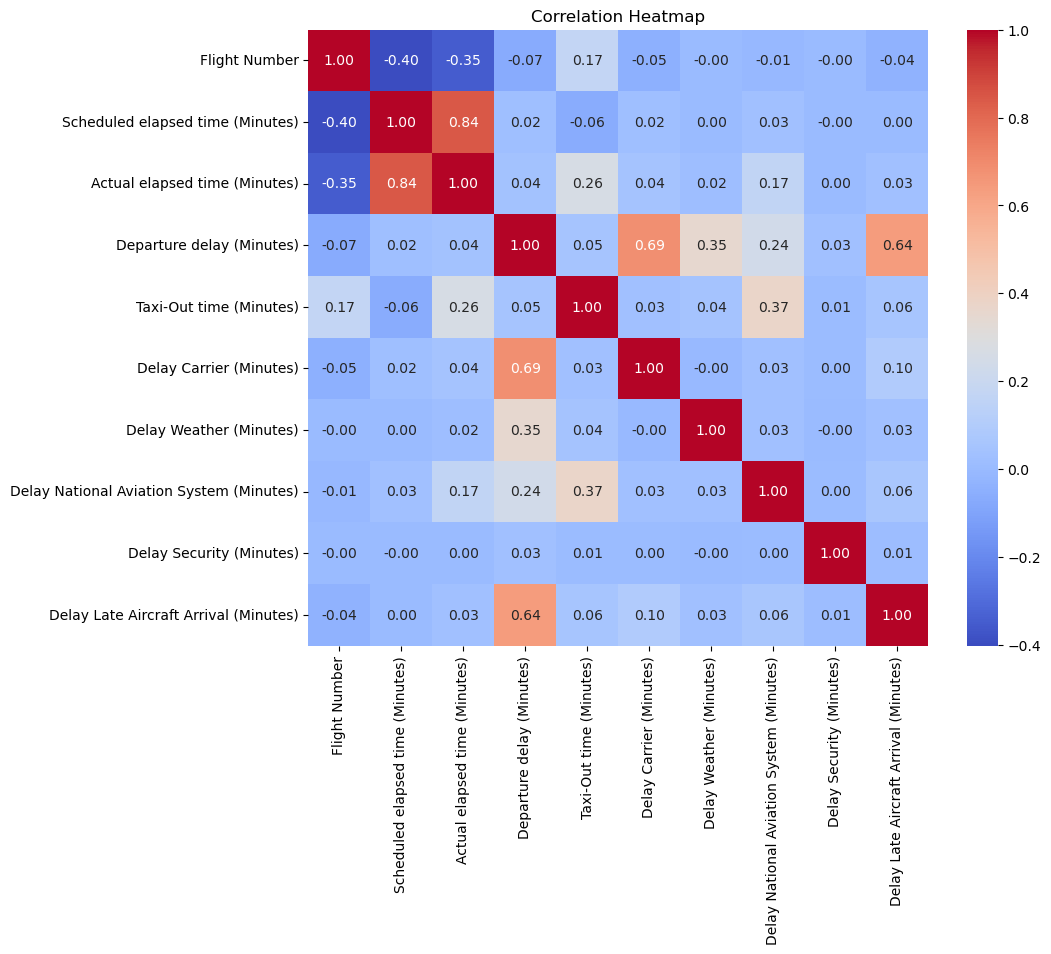

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = dep_df.corr(numeric_only=True)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [30]:
dep_df.drop(columns=['Destination Airport','Tail Number'],inplace=True)

dep_df.reset_index(drop=True, inplace=True)

In [31]:
dep_df

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Origin Airport
0,G4,01/02/2020,1737,06:30,06:29,176,167,-1,06:42,13,0,0,0,0,0,FLL
1,G4,01/03/2019,1720,06:50,06:49,182,167,-1,07:01,12,0,0,0,0,0,FLL
2,G4,01/03/2021,1744,16:25,17:40,178,168,75,17:53,13,0,0,0,0,65,FLL
3,G4,01/03/2022,962,06:15,06:15,176,175,0,06:30,15,0,0,0,0,0,FLL
4,G4,01/03/2023,523,06:30,10:34,182,170,244,10:51,17,232,0,0,0,0,FLL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56537,YX,12/16/2023,4312,19:45,19:39,213,198,-6,20:05,26,0,0,0,0,0,MIA
56538,YX,12/18/2021,5008,19:55,19:52,186,182,-3,20:10,18,0,0,0,0,0,MIA
56539,YX,12/23/2023,4371,19:44,19:42,206,187,-2,19:58,16,0,0,0,0,0,MIA
56540,YX,12/25/2021,5008,19:55,19:49,186,194,-6,20:10,21,0,0,0,0,0,MIA


In [32]:
dep_df = dep_df[dep_df['Origin Airport'].isin(['ORD', 'JFK', 'MCO'])]

dep_df.reset_index(drop=True, inplace=True)

In [33]:
dep_df.shape

(17463, 16)

In [34]:
dep_df["Actual departure time"] = dep_df["Actual departure time"].apply(lambda x: "00"+x[2:] if x[:2]=="24" else x)
dep_df["scheduled_dep_time"] = dep_df["Date (MM/DD/YYYY)"] + ' '+ dep_df["Scheduled departure time"]
dep_df["actual_dep_time"] = dep_df["Date (MM/DD/YYYY)"] + ' ' + dep_df["Actual departure time"]
dep_df

/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_75036/3177866961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dep_df["Actual departure time"] = dep_df["Actual departure time"].apply(lambda x: "00"+x[2:] if x[:2]=="24" else x)
/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_75036/3177866961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dep_df["scheduled_dep_time"] = dep_df["Date (MM/DD/YYYY)"] + ' '+ dep_df["Scheduled departure time"]
/var/folders/lr/q3cqkps15nxc_xvklh4_bfj

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Origin Airport,scheduled_dep_time,actual_dep_time
0,9E,01/01/2019,5391,10:05,09:53,82,96,-12,10:13,20,0,0,0,0,0,JFK,01/01/2019 10:05,01/01/2019 09:53
1,9E,01/01/2020,5066,10:05,09:51,92,72,-14,10:11,20,0,0,0,0,0,JFK,01/01/2020 10:05,01/01/2020 09:51
2,9E,01/01/2021,4851,17:29,17:21,76,68,-8,17:41,20,0,0,0,0,0,JFK,01/01/2021 17:29,01/01/2021 17:21
3,9E,01/01/2023,5190,21:10,21:05,91,68,-5,21:23,18,0,0,0,0,0,JFK,01/01/2023 21:10,01/01/2023 21:05
4,9E,01/02/2019,5391,10:05,09:56,83,92,-9,10:27,31,0,0,0,0,0,JFK,01/02/2019 10:05,01/02/2019 09:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17458,F9,12/30/2023,3792,16:35,16:28,171,178,-7,16:53,25,0,0,0,0,0,MCO,12/30/2023 16:35,12/30/2023 16:28
17459,F9,12/31/2020,1214,14:15,14:10,176,157,-5,14:23,13,0,0,0,0,0,MCO,12/31/2020 14:15,12/31/2020 14:10
17460,F9,12/31/2021,1214,17:01,16:56,166,169,-5,17:15,19,0,0,0,0,0,MCO,12/31/2021 17:01,12/31/2021 16:56
17461,F9,12/31/2022,1216,07:55,07:48,169,144,-7,08:04,16,0,0,0,0,0,MCO,12/31/2022 07:55,12/31/2022 07:48


In [35]:
dep_df["scheduled_dep_time"] = pd.to_datetime(dep_df["scheduled_dep_time"], format="%m/%d/%Y %H:%M")
dep_df["actual_dep_time"] = pd.to_datetime(dep_df["actual_dep_time"], format="%m/%d/%Y %H:%M")
dep_df["date"] = dep_df["actual_dep_time"].dt.date
dep_df

/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_75036/1488662363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dep_df["scheduled_dep_time"] = pd.to_datetime(dep_df["scheduled_dep_time"], format="%m/%d/%Y %H:%M")
/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_75036/1488662363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dep_df["actual_dep_time"] = pd.to_datetime(dep_df["actual_dep_time"], format="%m/%d/%Y %H:%M")
/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_7

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Origin Airport,scheduled_dep_time,actual_dep_time,date
0,9E,01/01/2019,5391,10:05,09:53,82,96,-12,10:13,20,0,0,0,0,0,JFK,2019-01-01 10:05:00,2019-01-01 09:53:00,2019-01-01
1,9E,01/01/2020,5066,10:05,09:51,92,72,-14,10:11,20,0,0,0,0,0,JFK,2020-01-01 10:05:00,2020-01-01 09:51:00,2020-01-01
2,9E,01/01/2021,4851,17:29,17:21,76,68,-8,17:41,20,0,0,0,0,0,JFK,2021-01-01 17:29:00,2021-01-01 17:21:00,2021-01-01
3,9E,01/01/2023,5190,21:10,21:05,91,68,-5,21:23,18,0,0,0,0,0,JFK,2023-01-01 21:10:00,2023-01-01 21:05:00,2023-01-01
4,9E,01/02/2019,5391,10:05,09:56,83,92,-9,10:27,31,0,0,0,0,0,JFK,2019-01-02 10:05:00,2019-01-02 09:56:00,2019-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17458,F9,12/30/2023,3792,16:35,16:28,171,178,-7,16:53,25,0,0,0,0,0,MCO,2023-12-30 16:35:00,2023-12-30 16:28:00,2023-12-30
17459,F9,12/31/2020,1214,14:15,14:10,176,157,-5,14:23,13,0,0,0,0,0,MCO,2020-12-31 14:15:00,2020-12-31 14:10:00,2020-12-31
17460,F9,12/31/2021,1214,17:01,16:56,166,169,-5,17:15,19,0,0,0,0,0,MCO,2021-12-31 17:01:00,2021-12-31 16:56:00,2021-12-31
17461,F9,12/31/2022,1216,07:55,07:48,169,144,-7,08:04,16,0,0,0,0,0,MCO,2022-12-31 07:55:00,2022-12-31 07:48:00,2022-12-31


## EDA on Weather Dataset

In [36]:
syr_df = pd.read_csv('./weather/SYR_weather_data_sub_hourly.csv')
syr_df

,app_temp,azimuth,clouds,dewpt,dhi,dni,elev_angle,ghi,pod,precip_rate,pres,revision_status,rh,slp,snow_rate,solar_rad,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather.icon,weather.description,weather.code,wind_dir,wind_gust_spd,wind_spd
0,-6.00,354.90,87,-4.40,0,0,-69.90,0,n,0.00,986,final,69,1001,0.00,0,0.60,2020-01-01T00:00:00,2020-01-01T05:00:00,1577854800,0.00,16,c04n,Overcast clouds,804,260,10.80,9.30
1,-5.80,274.30,90,-4.40,0,0,-69.20,0,n,0.00,986,final,69,1001,0.00,0,0.60,2020-01-01T00:15:00,2020-01-01T05:15:00,1577855700,0.00,16,c04n,Overcast clouds,804,255,10.90,8.77
2,-5.60,193.70,93,-4.40,0,0,-68.50,0,n,0.00,986,final,69,1001,0.00,0,0.60,2020-01-01T00:30:00,2020-01-01T05:30:00,1577856600,0.00,16,c04n,Overcast clouds,804,250,11.00,8.25
3,-5.40,113.10,96,-4.40,0,0,-67.90,0,n,0.00,986,final,69,1001,0.00,0,0.60,2020-01-01T00:45:00,2020-01-01T05:45:00,1577857500,0.00,16,c04n,Overcast clouds,804,245,11.10,7.72
4,-5.20,32.50,100,-4.40,0,0,-67.20,0,n,0.00,986,final,69,1001,0.00,0,0.60,2020-01-01T01:00:00,2020-01-01T06:00:00,1577858400,0.00,16,c04n,Overcast clouds,804,240,12.90,7.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149655,6.20,318.70,0,-1.20,0,0,-30.10,0,n,0.00,1006,interim,56,1021,0.00,0,7.00,2024-04-07T22:45:00,2024-04-08T02:45:00,1712544300,0.00,16,c01n,Clear Sky,800,20,1.60,1.54
149656,6.90,322.30,42,-2.20,0,0,-32.00,0,n,0.00,1006,interim,52,1022,0.00,0,7.00,2024-04-07T23:00:00,2024-04-08T03:00:00,1712545200,0.00,16,c03n,Broken clouds,803,0,1.00,1.00
149657,5.00,326.50,42,-4.20,0,0,-33.30,0,n,0.00,1006,interim,48,1022,0.00,0,6.00,2024-04-07T23:15:00,2024-04-08T03:15:00,1712546100,0.00,16,c03n,Broken clouds,803,210,1.60,1.54
149658,5.80,330.70,42,-2.10,0,0,-34.70,0,n,0.00,1007,interim,56,1022,0.00,0,6.00,2024-04-07T23:30:00,2024-04-08T03:30:00,1712547000,0.00,16,c03n,Broken clouds,803,0,1.00,1.00


In [37]:
# adding a new column in the syracuse weather dataset
syr_df["key"] = "SYR"

In [38]:
syr_df

,app_temp,azimuth,clouds,dewpt,dhi,dni,elev_angle,ghi,pod,precip_rate,pres,revision_status,rh,slp,snow_rate,solar_rad,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather.icon,weather.description,weather.code,wind_dir,wind_gust_spd,wind_spd,key
0,-6.00,354.90,87,-4.40,0,0,-69.90,0,n,0.00,986,final,69,1001,0.00,0,0.60,2020-01-01T00:00:00,2020-01-01T05:00:00,1577854800,0.00,16,c04n,Overcast clouds,804,260,10.80,9.30,SYR
1,-5.80,274.30,90,-4.40,0,0,-69.20,0,n,0.00,986,final,69,1001,0.00,0,0.60,2020-01-01T00:15:00,2020-01-01T05:15:00,1577855700,0.00,16,c04n,Overcast clouds,804,255,10.90,8.77,SYR
2,-5.60,193.70,93,-4.40,0,0,-68.50,0,n,0.00,986,final,69,1001,0.00,0,0.60,2020-01-01T00:30:00,2020-01-01T05:30:00,1577856600,0.00,16,c04n,Overcast clouds,804,250,11.00,8.25,SYR
3,-5.40,113.10,96,-4.40,0,0,-67.90,0,n,0.00,986,final,69,1001,0.00,0,0.60,2020-01-01T00:45:00,2020-01-01T05:45:00,1577857500,0.00,16,c04n,Overcast clouds,804,245,11.10,7.72,SYR
4,-5.20,32.50,100,-4.40,0,0,-67.20,0,n,0.00,986,final,69,1001,0.00,0,0.60,2020-01-01T01:00:00,2020-01-01T06:00:00,1577858400,0.00,16,c04n,Overcast clouds,804,240,12.90,7.20,SYR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149655,6.20,318.70,0,-1.20,0,0,-30.10,0,n,0.00,1006,interim,56,1021,0.00,0,7.00,2024-04-07T22:45:00,2024-04-08T02:45:00,1712544300,0.00,16,c01n,Clear Sky,800,20,1.60,1.54,SYR
149656,6.90,322.30,42,-2.20,0,0,-32.00,0,n,0.00,1006,interim,52,1022,0.00,0,7.00,2024-04-07T23:00:00,2024-04-08T03:00:00,1712545200,0.00,16,c03n,Broken clouds,803,0,1.00,1.00,SYR
149657,5.00,326.50,42,-4.20,0,0,-33.30,0,n,0.00,1006,interim,48,1022,0.00,0,6.00,2024-04-07T23:15:00,2024-04-08T03:15:00,1712546100,0.00,16,c03n,Broken clouds,803,210,1.60,1.54,SYR
149658,5.80,330.70,42,-2.10,0,0,-34.70,0,n,0.00,1007,interim,56,1022,0.00,0,6.00,2024-04-07T23:30:00,2024-04-08T03:30:00,1712547000,0.00,16,c03n,Broken clouds,803,0,1.00,1.00,SYR


In [39]:
syr_df.shape

(149660, 29)

In [40]:
syr_df.columns

Index(['app_temp', 'azimuth', 'clouds', 'dewpt', 'dhi', 'dni', 'elev_angle',
       'ghi', 'pod', 'precip_rate', 'pres', 'revision_status', 'rh', 'slp',
       'snow_rate', 'solar_rad', 'temp', 'timestamp_local', 'timestamp_utc',
       'ts', 'uv', 'vis', 'weather.icon', 'weather.description',
       'weather.code', 'wind_dir', 'wind_gust_spd', 'wind_spd', 'key'],
      dtype='object')

In [41]:
syr_df.isna().sum()

app_temp               0
azimuth                0
clouds                 0
dewpt                  0
dhi                    0
dni                    0
elev_angle             0
ghi                    0
pod                    0
precip_rate            0
pres                   0
revision_status        0
rh                     0
slp                    0
snow_rate              0
solar_rad              0
temp                   0
timestamp_local        0
timestamp_utc          0
ts                     0
uv                     0
vis                    0
weather.icon           0
weather.description    0
weather.code           0
wind_dir               0
wind_gust_spd          0
wind_spd               0
key                    0
dtype: int64

In [42]:
syr_df['timestamp_local'] = pd.to_datetime(syr_df['timestamp_local'])
syr_df = syr_df[(syr_df['timestamp_local'].dt.year >= 2020) & (syr_df['timestamp_local'].dt.year <= 2023)]
syr_df

,app_temp,azimuth,clouds,dewpt,dhi,dni,elev_angle,ghi,pod,precip_rate,pres,revision_status,rh,slp,snow_rate,solar_rad,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather.icon,weather.description,weather.code,wind_dir,wind_gust_spd,wind_spd,key
0,-6.00,354.90,87,-4.40,0,0,-69.90,0,n,0.00,986,final,69,1001,0.00,0,0.60,2020-01-01 00:00:00,2020-01-01T05:00:00,1577854800,0.00,16,c04n,Overcast clouds,804,260,10.80,9.30,SYR
1,-5.80,274.30,90,-4.40,0,0,-69.20,0,n,0.00,986,final,69,1001,0.00,0,0.60,2020-01-01 00:15:00,2020-01-01T05:15:00,1577855700,0.00,16,c04n,Overcast clouds,804,255,10.90,8.77,SYR
2,-5.60,193.70,93,-4.40,0,0,-68.50,0,n,0.00,986,final,69,1001,0.00,0,0.60,2020-01-01 00:30:00,2020-01-01T05:30:00,1577856600,0.00,16,c04n,Overcast clouds,804,250,11.00,8.25,SYR
3,-5.40,113.10,96,-4.40,0,0,-67.90,0,n,0.00,986,final,69,1001,0.00,0,0.60,2020-01-01 00:45:00,2020-01-01T05:45:00,1577857500,0.00,16,c04n,Overcast clouds,804,245,11.10,7.72,SYR
4,-5.20,32.50,100,-4.40,0,0,-67.20,0,n,0.00,986,final,69,1001,0.00,0,0.60,2020-01-01 01:00:00,2020-01-01T06:00:00,1577858400,0.00,16,c04n,Overcast clouds,804,240,12.90,7.20,SYR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,-5.00,314.10,100,-4.80,0,0,-63.40,0,n,0.00,1000,final,82,1016,0.00,0,-2.20,2023-12-31 22:45:00,2024-01-01T03:45:00,1704080700,0.00,16,c04n,Overcast clouds,804,340,3.90,1.95,SYR
140252,-5.10,319.80,100,-5.00,0,0,-65.60,0,n,0.00,1000,final,81,1016,0.00,0,-2.20,2023-12-31 23:00:00,2024-01-01T04:00:00,1704081600,0.00,16,c04n,Overcast clouds,804,340,4.00,2.10,SYR
140253,-5.50,328.60,100,-5.00,0,0,-66.60,0,n,0.00,1000,final,82,1016,0.00,0,-2.40,2023-12-31 23:15:00,2024-01-01T04:15:00,1704082500,0.00,16,c04n,Overcast clouds,804,340,4.00,2.22,SYR
140254,-5.80,337.30,100,-5.10,0,0,-67.70,0,n,0.00,1000,final,82,1016,0.00,0,-2.50,2023-12-31 23:30:00,2024-01-01T04:30:00,1704083400,0.00,16,c04n,Overcast clouds,804,345,4.00,2.35,SYR


In [43]:
jfk_df = pd.read_csv('./weather/JFK_weather_data_sub_hourly.csv')
jfk_df

,app_temp,azimuth,clouds,dewpt,dhi,dni,elev_angle,ghi,pod,precip_rate,pres,revision_status,rh,slp,snow_rate,solar_rad,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather.icon,weather.description,weather.code,wind_dir,wind_gust_spd,wind_spd
0,1.10,1.40,100,-0.80,0,0,-72.40,0,n,0.00,1003,final,64,1004,0.00,0,5.40,2020-01-01T00:00:00,2020-01-01T05:00:00,1577854800,0.00,16,c04n,Overcast clouds,804,275,11.20,7.07
1,0.70,11.30,100,-1.60,0,0,-71.30,0,n,0.00,1003,final,61,1004,0.00,0,5.30,2020-01-01T00:15:00,2020-01-01T05:15:00,1577855700,0.00,16,c04n,Overcast clouds,804,275,11.60,7.44
2,0.40,21.20,100,-2.20,0,0,-70.30,0,n,0.00,1003,final,59,1004,0.00,0,5.20,2020-01-01T00:30:00,2020-01-01T05:30:00,1577856600,0.00,16,c04n,Overcast clouds,804,280,12.00,7.82
3,0.10,31.20,100,-2.80,0,0,-69.20,0,n,0.00,1003,final,57,1004,0.00,0,5.00,2020-01-01T00:45:00,2020-01-01T05:45:00,1577857500,0.00,16,c04n,Overcast clouds,804,280,12.40,8.19
4,0.10,41.10,100,-2.80,0,0,-68.10,0,n,0.00,1003,final,57,1004,0.00,0,5.00,2020-01-01T01:00:00,2020-01-01T06:00:00,1577858400,0.00,16,c04n,Overcast clouds,804,280,12.00,8.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149655,4.50,320.10,0,3.00,0,0,-33.00,0,n,0.00,1020,interim,81,1021,0.00,0,6.00,2024-04-07T22:45:00,2024-04-08T02:45:00,1712544300,0.00,16,c01n,Clear Sky,800,230,2.20,2.06
149656,5.00,323.80,20,3.00,0,0,-35.00,0,n,0.00,1020,interim,81,1021,0.00,0,6.00,2024-04-07T23:00:00,2024-04-08T03:00:00,1712545200,0.00,16,c02n,Few clouds,801,220,1.60,1.54
149657,4.50,328.20,20,3.00,0,0,-36.30,0,n,0.00,1020,interim,81,1021,0.00,0,6.00,2024-04-07T23:15:00,2024-04-08T03:15:00,1712546100,0.00,16,c02n,Few clouds,801,240,2.20,2.06
149658,4.80,332.60,0,4.00,0,0,-37.60,0,n,0.00,1020,interim,81,1021,0.00,0,7.00,2024-04-07T23:30:00,2024-04-08T03:30:00,1712547000,0.00,16,c01n,Clear Sky,800,220,3.30,3.09


In [44]:
jfk_df.shape

(149660, 28)

In [45]:
jfk_df.isna().sum()

app_temp               0
azimuth                0
clouds                 0
dewpt                  0
dhi                    0
dni                    0
elev_angle             0
ghi                    0
pod                    0
precip_rate            0
pres                   0
revision_status        0
rh                     0
slp                    0
snow_rate              0
solar_rad              0
temp                   0
timestamp_local        0
timestamp_utc          0
ts                     0
uv                     0
vis                    0
weather.icon           0
weather.description    0
weather.code           0
wind_dir               0
wind_gust_spd          0
wind_spd               0
dtype: int64

In [46]:
# adding a new column in the jfk weather dataset
jfk_df["key"] = "JFK"
jfk_df

,app_temp,azimuth,clouds,dewpt,dhi,dni,elev_angle,ghi,pod,precip_rate,pres,revision_status,rh,slp,snow_rate,solar_rad,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather.icon,weather.description,weather.code,wind_dir,wind_gust_spd,wind_spd,key
0,1.10,1.40,100,-0.80,0,0,-72.40,0,n,0.00,1003,final,64,1004,0.00,0,5.40,2020-01-01T00:00:00,2020-01-01T05:00:00,1577854800,0.00,16,c04n,Overcast clouds,804,275,11.20,7.07,JFK
1,0.70,11.30,100,-1.60,0,0,-71.30,0,n,0.00,1003,final,61,1004,0.00,0,5.30,2020-01-01T00:15:00,2020-01-01T05:15:00,1577855700,0.00,16,c04n,Overcast clouds,804,275,11.60,7.44,JFK
2,0.40,21.20,100,-2.20,0,0,-70.30,0,n,0.00,1003,final,59,1004,0.00,0,5.20,2020-01-01T00:30:00,2020-01-01T05:30:00,1577856600,0.00,16,c04n,Overcast clouds,804,280,12.00,7.82,JFK
3,0.10,31.20,100,-2.80,0,0,-69.20,0,n,0.00,1003,final,57,1004,0.00,0,5.00,2020-01-01T00:45:00,2020-01-01T05:45:00,1577857500,0.00,16,c04n,Overcast clouds,804,280,12.40,8.19,JFK
4,0.10,41.10,100,-2.80,0,0,-68.10,0,n,0.00,1003,final,57,1004,0.00,0,5.00,2020-01-01T01:00:00,2020-01-01T06:00:00,1577858400,0.00,16,c04n,Overcast clouds,804,280,12.00,8.19,JFK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149655,4.50,320.10,0,3.00,0,0,-33.00,0,n,0.00,1020,interim,81,1021,0.00,0,6.00,2024-04-07T22:45:00,2024-04-08T02:45:00,1712544300,0.00,16,c01n,Clear Sky,800,230,2.20,2.06,JFK
149656,5.00,323.80,20,3.00,0,0,-35.00,0,n,0.00,1020,interim,81,1021,0.00,0,6.00,2024-04-07T23:00:00,2024-04-08T03:00:00,1712545200,0.00,16,c02n,Few clouds,801,220,1.60,1.54,JFK
149657,4.50,328.20,20,3.00,0,0,-36.30,0,n,0.00,1020,interim,81,1021,0.00,0,6.00,2024-04-07T23:15:00,2024-04-08T03:15:00,1712546100,0.00,16,c02n,Few clouds,801,240,2.20,2.06,JFK
149658,4.80,332.60,0,4.00,0,0,-37.60,0,n,0.00,1020,interim,81,1021,0.00,0,7.00,2024-04-07T23:30:00,2024-04-08T03:30:00,1712547000,0.00,16,c01n,Clear Sky,800,220,3.30,3.09,JFK


In [47]:
jfk_df['timestamp_local'] = pd.to_datetime(jfk_df['timestamp_local'])
jfk_df = jfk_df[(jfk_df['timestamp_local'].dt.year >= 2020) & (jfk_df['timestamp_local'].dt.year <= 2023)]
jfk_df

,app_temp,azimuth,clouds,dewpt,dhi,dni,elev_angle,ghi,pod,precip_rate,pres,revision_status,rh,slp,snow_rate,solar_rad,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather.icon,weather.description,weather.code,wind_dir,wind_gust_spd,wind_spd,key
0,1.10,1.40,100,-0.80,0,0,-72.40,0,n,0.00,1003,final,64,1004,0.00,0,5.40,2020-01-01 00:00:00,2020-01-01T05:00:00,1577854800,0.00,16,c04n,Overcast clouds,804,275,11.20,7.07,JFK
1,0.70,11.30,100,-1.60,0,0,-71.30,0,n,0.00,1003,final,61,1004,0.00,0,5.30,2020-01-01 00:15:00,2020-01-01T05:15:00,1577855700,0.00,16,c04n,Overcast clouds,804,275,11.60,7.44,JFK
2,0.40,21.20,100,-2.20,0,0,-70.30,0,n,0.00,1003,final,59,1004,0.00,0,5.20,2020-01-01 00:30:00,2020-01-01T05:30:00,1577856600,0.00,16,c04n,Overcast clouds,804,280,12.00,7.82,JFK
3,0.10,31.20,100,-2.80,0,0,-69.20,0,n,0.00,1003,final,57,1004,0.00,0,5.00,2020-01-01 00:45:00,2020-01-01T05:45:00,1577857500,0.00,16,c04n,Overcast clouds,804,280,12.40,8.19,JFK
4,0.10,41.10,100,-2.80,0,0,-68.10,0,n,0.00,1003,final,57,1004,0.00,0,5.00,2020-01-01 01:00:00,2020-01-01T06:00:00,1577858400,0.00,16,c04n,Overcast clouds,804,280,12.00,8.19,JFK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,3.20,314.60,100,-2.20,0,0,-66.30,0,n,0.00,1015,final,57,1016,0.00,0,5.60,2023-12-31 22:45:00,2024-01-01T03:45:00,1704080700,0.00,16,c04n,Overcast clouds,804,280,3.10,3.10,JFK
140252,2.70,320.80,100,-1.90,0,0,-68.60,0,n,0.00,1015,final,59,1016,0.00,0,5.40,2023-12-31 23:00:00,2024-01-01T04:00:00,1704081600,0.00,16,c04n,Overcast clouds,804,270,3.47,3.47,JFK
140253,2.30,240.90,100,-1.60,0,0,-69.50,0,n,0.00,1015,final,61,1016,0.00,0,5.30,2023-12-31 23:15:00,2024-01-01T04:15:00,1704082500,0.00,16,c04n,Overcast clouds,804,260,3.84,3.84,JFK
140254,1.90,161.10,100,-1.10,0,0,-70.50,0,n,0.00,1015,final,64,1016,0.00,0,5.20,2023-12-31 23:30:00,2024-01-01T04:30:00,1704083400,0.00,16,c04n,Overcast clouds,804,250,4.22,4.22,JFK


In [48]:
mco_df = pd.read_csv('./weather/MCO_weather_data_sub_hourly.csv')
mco_df

,app_temp,azimuth,clouds,dewpt,dhi,dni,elev_angle,ghi,pod,precip_rate,pres,revision_status,rh,slp,snow_rate,solar_rad,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather.description,weather.code,weather.icon,wind_dir,wind_gust_spd,wind_spd
0,13.30,308.50,0,7.10,0,0,-81.60,0,n,0.00,1015,final,66,1018,0,0,13.30,2020-01-01T00:00:00,2020-01-01T05:00:00,1577854800,0.00,16,Clear Sky,800,c01n,260,3.20,2.10
1,13.20,245.00,6,7.20,0,0,-81.50,0,n,0.00,1015,final,67,1018,0,0,13.20,2020-01-01T00:15:00,2020-01-01T05:15:00,1577855700,0.00,16,Few clouds,801,c02n,265,3.20,2.22
2,13.10,181.50,12,7.50,0,0,-81.40,0,n,0.00,1014,final,69,1018,0,0,13.10,2020-01-01T00:30:00,2020-01-01T05:30:00,1577856600,0.00,16,Few clouds,801,c02n,270,3.20,2.35
3,12.90,118.00,18,7.60,0,0,-81.20,0,n,0.00,1014,final,70,1018,0,0,12.90,2020-01-01T00:45:00,2020-01-01T05:45:00,1577857500,0.00,16,Few clouds,801,c02n,275,3.20,2.47
4,12.80,54.50,25,7.70,0,0,-81.10,0,n,0.00,1014,final,71,1018,0,0,12.80,2020-01-01T01:00:00,2020-01-01T06:00:00,1577858400,0.00,16,Scattered clouds,802,c02n,280,3.20,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149655,17.00,306.50,0,9.90,0,0,-36.90,0,n,0.00,1016,interim,63,1020,0,0,17.00,2024-04-07T22:45:00,2024-04-08T02:45:00,1712544300,0.00,16,Clear Sky,800,c01n,60,3.30,3.09
149656,17.00,309.60,0,10.80,0,0,-39.60,0,n,0.00,1017,interim,67,1021,0,0,17.00,2024-04-07T23:00:00,2024-04-08T03:00:00,1712545200,0.00,16,Clear Sky,800,c01n,60,3.30,3.09
149657,17.00,313.70,0,10.80,0,0,-41.90,0,n,0.00,1017,interim,67,1021,0,0,17.00,2024-04-07T23:15:00,2024-04-08T03:15:00,1712546100,0.00,16,Clear Sky,800,c01n,60,3.30,3.09
149658,17.00,317.90,0,10.80,0,0,-44.10,0,n,0.00,1017,interim,67,1021,0,0,17.00,2024-04-07T23:30:00,2024-04-08T03:30:00,1712547000,0.00,16,Clear Sky,800,c01n,70,3.30,3.09


In [49]:
mco_df.isna().sum()

app_temp               0
azimuth                0
clouds                 0
dewpt                  0
dhi                    0
dni                    0
elev_angle             0
ghi                    0
pod                    0
precip_rate            0
pres                   0
revision_status        0
rh                     0
slp                    0
snow_rate              0
solar_rad              0
temp                   0
timestamp_local        0
timestamp_utc          0
ts                     0
uv                     0
vis                    0
weather.description    0
weather.code           0
weather.icon           0
wind_dir               0
wind_gust_spd          0
wind_spd               0
dtype: int64

In [50]:
# adding a new column in the MCO weather dataset
mco_df["key"] = "MCO"
mco_df

,app_temp,azimuth,clouds,dewpt,dhi,dni,elev_angle,ghi,pod,precip_rate,pres,revision_status,rh,slp,snow_rate,solar_rad,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather.description,weather.code,weather.icon,wind_dir,wind_gust_spd,wind_spd,key
0,13.30,308.50,0,7.10,0,0,-81.60,0,n,0.00,1015,final,66,1018,0,0,13.30,2020-01-01T00:00:00,2020-01-01T05:00:00,1577854800,0.00,16,Clear Sky,800,c01n,260,3.20,2.10,MCO
1,13.20,245.00,6,7.20,0,0,-81.50,0,n,0.00,1015,final,67,1018,0,0,13.20,2020-01-01T00:15:00,2020-01-01T05:15:00,1577855700,0.00,16,Few clouds,801,c02n,265,3.20,2.22,MCO
2,13.10,181.50,12,7.50,0,0,-81.40,0,n,0.00,1014,final,69,1018,0,0,13.10,2020-01-01T00:30:00,2020-01-01T05:30:00,1577856600,0.00,16,Few clouds,801,c02n,270,3.20,2.35,MCO
3,12.90,118.00,18,7.60,0,0,-81.20,0,n,0.00,1014,final,70,1018,0,0,12.90,2020-01-01T00:45:00,2020-01-01T05:45:00,1577857500,0.00,16,Few clouds,801,c02n,275,3.20,2.47,MCO
4,12.80,54.50,25,7.70,0,0,-81.10,0,n,0.00,1014,final,71,1018,0,0,12.80,2020-01-01T01:00:00,2020-01-01T06:00:00,1577858400,0.00,16,Scattered clouds,802,c02n,280,3.20,2.60,MCO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149655,17.00,306.50,0,9.90,0,0,-36.90,0,n,0.00,1016,interim,63,1020,0,0,17.00,2024-04-07T22:45:00,2024-04-08T02:45:00,1712544300,0.00,16,Clear Sky,800,c01n,60,3.30,3.09,MCO
149656,17.00,309.60,0,10.80,0,0,-39.60,0,n,0.00,1017,interim,67,1021,0,0,17.00,2024-04-07T23:00:00,2024-04-08T03:00:00,1712545200,0.00,16,Clear Sky,800,c01n,60,3.30,3.09,MCO
149657,17.00,313.70,0,10.80,0,0,-41.90,0,n,0.00,1017,interim,67,1021,0,0,17.00,2024-04-07T23:15:00,2024-04-08T03:15:00,1712546100,0.00,16,Clear Sky,800,c01n,60,3.30,3.09,MCO
149658,17.00,317.90,0,10.80,0,0,-44.10,0,n,0.00,1017,interim,67,1021,0,0,17.00,2024-04-07T23:30:00,2024-04-08T03:30:00,1712547000,0.00,16,Clear Sky,800,c01n,70,3.30,3.09,MCO


In [51]:
mco_df.shape

(149660, 29)

In [52]:
mco_df['timestamp_local'] = pd.to_datetime(mco_df['timestamp_local'])
mco_df = mco_df[(mco_df['timestamp_local'].dt.year >= 2020) & (mco_df['timestamp_local'].dt.year <= 2023)]
mco_df

,app_temp,azimuth,clouds,dewpt,dhi,dni,elev_angle,ghi,pod,precip_rate,pres,revision_status,rh,slp,snow_rate,solar_rad,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather.description,weather.code,weather.icon,wind_dir,wind_gust_spd,wind_spd,key
0,13.30,308.50,0,7.10,0,0,-81.60,0,n,0.00,1015,final,66,1018,0,0,13.30,2020-01-01 00:00:00,2020-01-01T05:00:00,1577854800,0.00,16,Clear Sky,800,c01n,260,3.20,2.10,MCO
1,13.20,245.00,6,7.20,0,0,-81.50,0,n,0.00,1015,final,67,1018,0,0,13.20,2020-01-01 00:15:00,2020-01-01T05:15:00,1577855700,0.00,16,Few clouds,801,c02n,265,3.20,2.22,MCO
2,13.10,181.50,12,7.50,0,0,-81.40,0,n,0.00,1014,final,69,1018,0,0,13.10,2020-01-01 00:30:00,2020-01-01T05:30:00,1577856600,0.00,16,Few clouds,801,c02n,270,3.20,2.35,MCO
3,12.90,118.00,18,7.60,0,0,-81.20,0,n,0.00,1014,final,70,1018,0,0,12.90,2020-01-01 00:45:00,2020-01-01T05:45:00,1577857500,0.00,16,Few clouds,801,c02n,275,3.20,2.47,MCO
4,12.80,54.50,25,7.70,0,0,-81.10,0,n,0.00,1014,final,71,1018,0,0,12.80,2020-01-01 01:00:00,2020-01-01T06:00:00,1577858400,0.00,16,Scattered clouds,802,c02n,280,3.20,2.60,MCO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,12.30,277.70,25,8.20,0,0,-66.10,0,n,0.00,1019,final,76,1024,0,0,12.30,2023-12-31 22:45:00,2024-01-01T03:45:00,1704080700,0.00,15,Scattered clouds,802,c02n,210,2.40,1.90,MCO
140252,12.20,280.10,25,8.30,0,0,-69.40,0,n,0.00,1019,final,77,1024,0,0,12.20,2023-12-31 23:00:00,2024-01-01T04:00:00,1704081600,0.00,14,Scattered clouds,802,c02n,210,2.40,2.00,MCO
140253,11.50,287.20,25,8.20,0,0,-72.50,0,n,0.00,1019,final,80,1024,0,0,11.50,2023-12-31 23:15:00,2024-01-01T04:15:00,1704082500,0.00,14,Scattered clouds,802,c02n,210,2.30,0.37,MCO
140254,10.80,294.30,25,8.00,0,0,-75.50,0,n,0.00,1019,final,83,1024,0,0,10.80,2023-12-31 23:30:00,2024-01-01T04:30:00,1704083400,0.00,13,Scattered clouds,802,c02n,210,2.20,0.75,MCO


In [53]:
ord_df = pd.read_csv('./weather/ORD_weather_data_sub_hourly.csv')
ord_df.head()

,app_temp,azimuth,clouds,dewpt,dhi,dni,elev_angle,ghi,pod,precip_rate,pres,revision_status,rh,slp,snow_rate,solar_rad,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather.code,weather.icon,weather.description,wind_dir,wind_gust_spd,wind_spd
0,-8.90,3.60,25,-6.30,0,0,-71.00,0,n,0.00,984,final,84,1010,0.00,0,-4.00,2020-01-01T00:00:00,2020-01-01T06:00:00,1577858400,0.00,16,802,c02n,Scattered clouds,270,6.40,3.60
1,-9.00,12.90,25,-6.40,0,0,-69.90,0,n,0.00,984,final,84,1010,0.00,0,-4.20,2020-01-01T00:15:00,2020-01-01T06:15:00,1577859300,0.00,16,802,c02n,Scattered clouds,270,6.40,3.60
2,-9.20,22.10,25,-6.60,0,0,-68.90,0,n,0.00,984,final,84,1010,0.00,0,-4.30,2020-01-01T00:30:00,2020-01-01T06:30:00,1577860200,0.00,16,802,c02n,Scattered clouds,270,6.40,3.60
3,-9.40,31.40,25,-6.80,0,0,-67.80,0,n,0.00,984,final,83,1010,0.00,0,-4.40,2020-01-01T00:45:00,2020-01-01T06:45:00,1577861100,0.00,16,802,c02n,Scattered clouds,270,6.40,3.60
4,-9.30,40.60,25,-6.80,0,0,-66.70,0,n,0.00,984,final,84,1010,0.00,0,-4.50,2020-01-01T01:00:00,2020-01-01T07:00:00,1577862000,0.00,16,802,c02n,Scattered clouds,270,6.40,3.35


In [54]:
# adding a new column in the MCO weather dataset
ord_df["key"] = "ORD"
ord_df

,app_temp,azimuth,clouds,dewpt,dhi,dni,elev_angle,ghi,pod,precip_rate,pres,revision_status,rh,slp,snow_rate,solar_rad,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather.code,weather.icon,weather.description,wind_dir,wind_gust_spd,wind_spd,key
0,-8.90,3.60,25,-6.30,0,0,-71.00,0,n,0.00,984,final,84,1010,0.00,0,-4.00,2020-01-01T00:00:00,2020-01-01T06:00:00,1577858400,0.00,16,802,c02n,Scattered clouds,270,6.40,3.60,ORD
1,-9.00,12.90,25,-6.40,0,0,-69.90,0,n,0.00,984,final,84,1010,0.00,0,-4.20,2020-01-01T00:15:00,2020-01-01T06:15:00,1577859300,0.00,16,802,c02n,Scattered clouds,270,6.40,3.60,ORD
2,-9.20,22.10,25,-6.60,0,0,-68.90,0,n,0.00,984,final,84,1010,0.00,0,-4.30,2020-01-01T00:30:00,2020-01-01T06:30:00,1577860200,0.00,16,802,c02n,Scattered clouds,270,6.40,3.60,ORD
3,-9.40,31.40,25,-6.80,0,0,-67.80,0,n,0.00,984,final,83,1010,0.00,0,-4.40,2020-01-01T00:45:00,2020-01-01T06:45:00,1577861100,0.00,16,802,c02n,Scattered clouds,270,6.40,3.60,ORD
4,-9.30,40.60,25,-6.80,0,0,-66.70,0,n,0.00,984,final,84,1010,0.00,0,-4.50,2020-01-01T01:00:00,2020-01-01T07:00:00,1577862000,0.00,16,802,c02n,Scattered clouds,270,6.40,3.35,ORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149655,8.00,321.50,0,6.00,0,0,-32.40,0,n,0.00,986,interim,87,1010,0.00,0,8.00,2024-04-07T22:45:00,2024-04-08T03:45:00,1712547900,0.00,16,800,c01n,Clear Sky,90,3.30,3.09,ORD
149656,8.00,325.20,0,6.00,0,0,-34.30,0,n,0.00,986,interim,87,1010,0.00,0,8.00,2024-04-07T23:00:00,2024-04-08T04:00:00,1712548800,0.00,16,800,c01n,Clear Sky,100,3.30,3.09,ORD
149657,4.80,329.60,0,5.00,0,0,-35.50,0,n,0.00,986,interim,87,1010,0.00,0,7.00,2024-04-07T23:15:00,2024-04-08T04:15:00,1712549700,0.00,16,800,c01n,Clear Sky,100,3.30,3.09,ORD
149658,5.20,334.00,5,5.90,0,0,-36.70,0,n,0.00,986,interim,93,1010,0.00,0,7.00,2024-04-07T23:30:00,2024-04-08T04:30:00,1712550600,0.00,16,801,c02n,Few clouds,110,2.70,2.57,ORD


In [55]:
ord_df.isna().sum()

app_temp               0
azimuth                0
clouds                 0
dewpt                  0
dhi                    0
dni                    0
elev_angle             0
ghi                    0
pod                    0
precip_rate            0
pres                   0
revision_status        0
rh                     0
slp                    0
snow_rate              0
solar_rad              0
temp                   0
timestamp_local        0
timestamp_utc          0
ts                     0
uv                     0
vis                    0
weather.code           0
weather.icon           0
weather.description    0
wind_dir               0
wind_gust_spd          0
wind_spd               0
key                    0
dtype: int64

In [56]:
ord_df.shape

(149660, 29)

In [57]:
ord_df['timestamp_local'] = pd.to_datetime(ord_df['timestamp_local'])
ord_df = ord_df[(ord_df['timestamp_local'].dt.year >= 2020) & (ord_df['timestamp_local'].dt.year <= 2023)]
ord_df

,app_temp,azimuth,clouds,dewpt,dhi,dni,elev_angle,ghi,pod,precip_rate,pres,revision_status,rh,slp,snow_rate,solar_rad,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather.code,weather.icon,weather.description,wind_dir,wind_gust_spd,wind_spd,key
0,-8.90,3.60,25,-6.30,0,0,-71.00,0,n,0.00,984,final,84,1010,0.00,0,-4.00,2020-01-01 00:00:00,2020-01-01T06:00:00,1577858400,0.00,16,802,c02n,Scattered clouds,270,6.40,3.60,ORD
1,-9.00,12.90,25,-6.40,0,0,-69.90,0,n,0.00,984,final,84,1010,0.00,0,-4.20,2020-01-01 00:15:00,2020-01-01T06:15:00,1577859300,0.00,16,802,c02n,Scattered clouds,270,6.40,3.60,ORD
2,-9.20,22.10,25,-6.60,0,0,-68.90,0,n,0.00,984,final,84,1010,0.00,0,-4.30,2020-01-01 00:30:00,2020-01-01T06:30:00,1577860200,0.00,16,802,c02n,Scattered clouds,270,6.40,3.60,ORD
3,-9.40,31.40,25,-6.80,0,0,-67.80,0,n,0.00,984,final,83,1010,0.00,0,-4.40,2020-01-01 00:45:00,2020-01-01T06:45:00,1577861100,0.00,16,802,c02n,Scattered clouds,270,6.40,3.60,ORD
4,-9.30,40.60,25,-6.80,0,0,-66.70,0,n,0.00,984,final,84,1010,0.00,0,-4.50,2020-01-01 01:00:00,2020-01-01T07:00:00,1577862000,0.00,16,802,c02n,Scattered clouds,270,6.40,3.35,ORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,-5.20,318.30,100,-3.00,0,0,-65.80,0,n,0.00,995,final,77,1020,0.00,0,0.60,2023-12-31 22:45:00,2024-01-01T04:45:00,1704084300,0.00,16,804,c04n,Overcast clouds,330,10.80,7.20,ORD
140252,-5.30,324.60,100,-2.90,0,0,-67.90,0,n,0.00,995,final,78,1020,0.00,0,0.40,2023-12-31 23:00:00,2024-01-01T05:00:00,1704085200,0.00,16,804,c04n,Overcast clouds,330,10.80,6.82,ORD
140253,-5.30,244.30,100,-2.90,0,0,-68.70,0,n,0.00,995,final,79,1020,0.00,0,0.30,2023-12-31 23:15:00,2024-01-01T05:15:00,1704086100,0.00,16,804,c04n,Overcast clouds,330,10.60,6.45,ORD
140254,-5.30,164.10,100,-2.90,0,0,-69.40,0,n,0.00,996,final,80,1020,0.00,0,0.10,2023-12-31 23:30:00,2024-01-01T05:30:00,1704087000,0.00,16,804,c04n,Overcast clouds,330,10.40,6.07,ORD


In [58]:
arr_df["date_time"] = pd.to_datetime(arr_df["scheduled_time"])
arr_df

/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_75036/99267263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr_df["date_time"] = pd.to_datetime(arr_df["scheduled_time"])


,Carrier Code,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),scheduled_time,actual_time,date,date_time
0,UA,01/01/2023,2645,ORD,23:57,23:47,107,100,-10,23:41,6,0,0,0,0,0,2023-01-01 23:57:00,2023-01-01 23:47:00,2023-01-01,2023-01-01 23:57:00
1,UA,01/02/2023,1998,ORD,21:07,20:46,113,89,-21,20:43,3,0,0,0,0,0,2023-01-02 21:07:00,2023-01-02 20:46:00,2023-01-02,2023-01-02 21:07:00
2,UA,01/03/2023,1998,ORD,21:07,21:04,113,111,-3,20:58,6,0,0,0,0,0,2023-01-03 21:07:00,2023-01-03 21:04:00,2023-01-03,2023-01-03 21:07:00
3,UA,01/04/2023,1998,ORD,21:17,21:31,113,110,14,21:26,5,0,0,0,0,0,2023-01-04 21:17:00,2023-01-04 21:31:00,2023-01-04,2023-01-04 21:17:00
4,UA,01/05/2020,2012,ORD,21:47,21:55,107,94,8,21:50,5,0,0,0,0,0,2020-01-05 21:47:00,2020-01-05 21:55:00,2020-01-05,2020-01-05 21:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17459,WN,12/28/2023,3149,MCO,13:00,13:08,160,147,8,13:05,3,0,0,0,0,0,2023-12-28 13:00:00,2023-12-28 13:08:00,2023-12-28,2023-12-28 13:00:00
17460,WN,12/29/2023,3149,MCO,13:00,12:46,160,150,-14,12:43,3,0,0,0,0,0,2023-12-29 13:00:00,2023-12-29 12:46:00,2023-12-29,2023-12-29 13:00:00
17461,WN,12/30/2023,3208,MCO,12:30,12:23,160,157,-7,12:14,9,0,0,0,0,0,2023-12-30 12:30:00,2023-12-30 12:23:00,2023-12-30,2023-12-30 12:30:00
17462,WN,12/31/2022,1149,MCO,14:05,14:12,160,147,7,14:10,2,0,0,0,0,0,2022-12-31 14:05:00,2022-12-31 14:12:00,2022-12-31,2022-12-31 14:05:00


In [59]:
arr_df_sub = arr_df[arr_df["date_time"]>=pd.Timestamp("2020-01-01")].sort_values("date_time").reset_index(drop=True)
arr_df_sub

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),scheduled_time,actual_time,date,date_time
0,B6,01/01/2020,116,JFK,08:22,08:08,75,62,-14,08:05,3,0,0,0,0,0,2020-01-01 08:22:00,2020-01-01 08:08:00,2020-01-01,2020-01-01 08:22:00
1,OO,01/01/2020,3247,ORD,10:43,10:40,113,110,-3,10:36,4,0,0,0,0,0,2020-01-01 10:43:00,2020-01-01 10:40:00,2020-01-01,2020-01-01 10:43:00
2,9E,01/01/2020,5066,JFK,11:37,11:03,92,72,-34,10:58,5,0,0,0,0,0,2020-01-01 11:37:00,2020-01-01 11:03:00,2020-01-01,2020-01-01 11:37:00
3,F9,01/01/2020,1214,MCO,14:39,14:23,164,156,-16,14:17,6,0,0,0,0,0,2020-01-01 14:39:00,2020-01-01 14:23:00,2020-01-01,2020-01-01 14:39:00
4,OO,01/01/2020,3253,ORD,14:43,14:38,113,110,-5,14:33,5,0,0,0,0,0,2020-01-01 14:43:00,2020-01-01 14:38:00,2020-01-01,2020-01-01 14:43:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12336,YX,12/31/2023,3719,ORD,16:44,17:18,124,157,34,17:11,7,0,0,34,0,0,2023-12-31 16:44:00,2023-12-31 17:18:00,2023-12-31,2023-12-31 16:44:00
12337,MQ,12/31/2023,4091,ORD,17:28,19:10,106,105,102,19:05,5,0,34,0,0,68,2023-12-31 17:28:00,2023-12-31 19:10:00,2023-12-31,2023-12-31 17:28:00
12338,B6,12/31/2023,656,MCO,19:27,18:51,175,148,-36,18:48,3,0,0,0,0,0,2023-12-31 19:27:00,2023-12-31 18:51:00,2023-12-31,2023-12-31 19:27:00
12339,UA,12/31/2023,1983,ORD,21:09,20:59,114,113,-10,20:54,5,0,0,0,0,0,2023-12-31 21:09:00,2023-12-31 20:59:00,2023-12-31,2023-12-31 21:09:00


In [60]:
dep_df["date_time"] = pd.to_datetime(dep_df["scheduled_dep_time"])
dep_df

/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_75036/1996971212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dep_df["date_time"] = pd.to_datetime(dep_df["scheduled_dep_time"])


,Carrier Code,Date (MM/DD/YYYY),Flight Number,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Origin Airport,scheduled_dep_time,actual_dep_time,date,date_time
0,9E,01/01/2019,5391,10:05,09:53,82,96,-12,10:13,20,0,0,0,0,0,JFK,2019-01-01 10:05:00,2019-01-01 09:53:00,2019-01-01,2019-01-01 10:05:00
1,9E,01/01/2020,5066,10:05,09:51,92,72,-14,10:11,20,0,0,0,0,0,JFK,2020-01-01 10:05:00,2020-01-01 09:51:00,2020-01-01,2020-01-01 10:05:00
2,9E,01/01/2021,4851,17:29,17:21,76,68,-8,17:41,20,0,0,0,0,0,JFK,2021-01-01 17:29:00,2021-01-01 17:21:00,2021-01-01,2021-01-01 17:29:00
3,9E,01/01/2023,5190,21:10,21:05,91,68,-5,21:23,18,0,0,0,0,0,JFK,2023-01-01 21:10:00,2023-01-01 21:05:00,2023-01-01,2023-01-01 21:10:00
4,9E,01/02/2019,5391,10:05,09:56,83,92,-9,10:27,31,0,0,0,0,0,JFK,2019-01-02 10:05:00,2019-01-02 09:56:00,2019-01-02,2019-01-02 10:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17458,F9,12/30/2023,3792,16:35,16:28,171,178,-7,16:53,25,0,0,0,0,0,MCO,2023-12-30 16:35:00,2023-12-30 16:28:00,2023-12-30,2023-12-30 16:35:00
17459,F9,12/31/2020,1214,14:15,14:10,176,157,-5,14:23,13,0,0,0,0,0,MCO,2020-12-31 14:15:00,2020-12-31 14:10:00,2020-12-31,2020-12-31 14:15:00
17460,F9,12/31/2021,1214,17:01,16:56,166,169,-5,17:15,19,0,0,0,0,0,MCO,2021-12-31 17:01:00,2021-12-31 16:56:00,2021-12-31,2021-12-31 17:01:00
17461,F9,12/31/2022,1216,07:55,07:48,169,144,-7,08:04,16,0,0,0,0,0,MCO,2022-12-31 07:55:00,2022-12-31 07:48:00,2022-12-31,2022-12-31 07:55:00


In [61]:
dep_df_sub = dep_df[dep_df["date_time"]>=pd.Timestamp("2020-01-01")].sort_values("date_time").reset_index(drop=True)
dep_df_sub

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Origin Airport,scheduled_dep_time,actual_dep_time,date,date_time
0,B6,01/01/2020,116,07:07,07:06,75,62,-1,07:17,11,0,0,0,0,0,JFK,2020-01-01 07:07:00,2020-01-01 07:06:00,2020-01-01,2020-01-01 07:07:00
1,OO,01/01/2020,3247,07:50,07:50,113,110,0,08:18,28,0,0,0,0,0,ORD,2020-01-01 07:50:00,2020-01-01 07:50:00,2020-01-01,2020-01-01 07:50:00
2,9E,01/01/2020,5066,10:05,09:51,92,72,-14,10:11,20,0,0,0,0,0,JFK,2020-01-01 10:05:00,2020-01-01 09:51:00,2020-01-01,2020-01-01 10:05:00
3,OO,01/01/2020,3253,11:50,11:48,113,110,-2,12:13,25,0,0,0,0,0,ORD,2020-01-01 11:50:00,2020-01-01 11:48:00,2020-01-01,2020-01-01 11:50:00
4,F9,01/01/2020,1214,11:55,11:47,164,156,-8,12:01,14,0,0,0,0,0,MCO,2020-01-01 11:55:00,2020-01-01 11:47:00,2020-01-01,2020-01-01 11:55:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12335,B6,12/31/2023,116,14:22,14:32,78,61,10,14:45,13,0,0,0,0,0,JFK,2023-12-31 14:22:00,2023-12-31 14:32:00,2023-12-31,2023-12-31 14:22:00
12336,MQ,12/31/2023,4091,14:42,16:25,106,105,103,16:36,11,0,34,0,0,68,ORD,2023-12-31 14:42:00,2023-12-31 16:25:00,2023-12-31,2023-12-31 14:42:00
12337,B6,12/31/2023,656,16:32,16:23,175,148,-9,16:37,14,0,0,0,0,0,MCO,2023-12-31 16:32:00,2023-12-31 16:23:00,2023-12-31,2023-12-31 16:32:00
12338,UA,12/31/2023,1983,18:15,18:06,114,113,-9,18:30,24,0,0,0,0,0,ORD,2023-12-31 18:15:00,2023-12-31 18:06:00,2023-12-31,2023-12-31 18:15:00


## Merging the data

In [62]:
print(jfk_df.shape)
print(mco_df.shape)
print(ord_df.shape)
print(syr_df.shape)

(140256, 29)
(140256, 29)
(140256, 29)
(140256, 29)


## Merging arrivals dataset with Syracuse weather

In [63]:
wea_factors = ['temp', 'wind_gust_spd', 'uv', 'wind_dir', 'clouds', 'dewpt', 'app_temp', 'rh', 'timestamp_local', 'wind_spd', 'weather.code', 'vis', 'pres','key']

syr_df_sub = syr_df[wea_factors]

jfk_df_sub = jfk_df[wea_factors]

mco_df_sub = mco_df[wea_factors]

ord_df_sub = ord_df[wea_factors]

In [64]:
print(syr_df_sub.shape)
print(jfk_df_sub.shape)
print(mco_df_sub.shape)
print(ord_df_sub.shape)

(140256, 14)
(140256, 14)
(140256, 14)
(140256, 14)


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

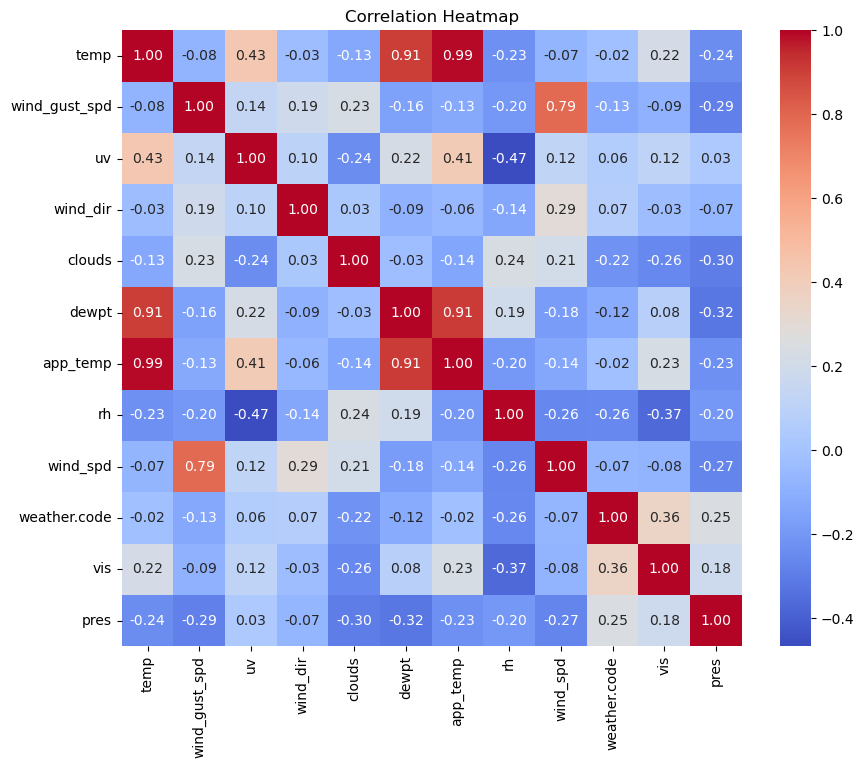

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = syr_df_sub.corr(numeric_only=True)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [66]:
syr_df_sub["date_time_map"] = pd.to_datetime(syr_df_sub["timestamp_local"])
jfk_df_sub["date_time_map"] = pd.to_datetime(jfk_df_sub["timestamp_local"])
mco_df_sub["date_time_map"] = pd.to_datetime(mco_df_sub["timestamp_local"])
ord_df_sub["date_time_map"] = pd.to_datetime(ord_df_sub["timestamp_local"])

/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_75036/4218454715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syr_df_sub["date_time_map"] = pd.to_datetime(syr_df_sub["timestamp_local"])
/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_75036/4218454715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jfk_df_sub["date_time_map"] = pd.to_datetime(jfk_df_sub["timestamp_local"])
/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_75036/4218454715.py:3: SettingWithCopyWarning

In [67]:
syr_merged_data = pd.merge_asof(arr_df_sub.sort_values('date_time'),
                                       syr_df_sub.sort_values('date_time_map'),
                                       left_on='date_time', right_on='date_time_map', direction='nearest')

syr_merged_data.head()


,Carrier Code,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),scheduled_time,actual_time,date,date_time,temp,wind_gust_spd,uv,wind_dir,clouds,dewpt,app_temp,rh,timestamp_local,wind_spd,weather.code,vis,pres,key,date_time_map
0,B6,01/01/2020,116,JFK,08:22,08:08,75,62,-14,08:05,3,0,0,0,0,0,2020-01-01 08:22:00,2020-01-01 08:08:00,2020-01-01,2020-01-01 08:22:00,-0.40,12.10,0.40,250,100,-6.20,-6.50,65,2020-01-01 08:15:00,7.07,804,16,989,SYR,2020-01-01 08:15:00
1,OO,01/01/2020,3247,ORD,10:43,10:40,113,110,-3,10:36,4,0,0,0,0,0,2020-01-01 10:43:00,2020-01-01 10:40:00,2020-01-01,2020-01-01 10:43:00,0.60,14.90,0.60,255,100,-5.20,-5.00,65,2020-01-01 10:45:00,6.70,804,16,990,SYR,2020-01-01 10:45:00
2,9E,01/01/2020,5066,JFK,11:37,11:03,92,72,-34,10:58,5,0,0,0,0,0,2020-01-01 11:37:00,2020-01-01 11:03:00,2020-01-01,2020-01-01 11:37:00,0.80,12.60,0.60,265,100,-5.40,-5.10,63,2020-01-01 11:30:00,7.75,804,16,990,SYR,2020-01-01 11:30:00
3,F9,01/01/2020,1214,MCO,14:39,14:23,164,156,-16,14:17,6,0,0,0,0,0,2020-01-01 14:39:00,2020-01-01 14:23:00,2020-01-01,2020-01-01 14:39:00,1.30,12.00,0.50,260,100,-5.60,-4.40,60,2020-01-01 14:45:00,7.32,804,16,991,SYR,2020-01-01 14:45:00
4,OO,01/01/2020,3253,ORD,14:43,14:38,113,110,-5,14:33,5,0,0,0,0,0,2020-01-01 14:43:00,2020-01-01 14:38:00,2020-01-01,2020-01-01 14:43:00,1.30,12.00,0.50,260,100,-5.60,-4.40,60,2020-01-01 14:45:00,7.32,804,16,991,SYR,2020-01-01 14:45:00


In [68]:
syr_merged_data.shape

(12341, 35)

In [69]:
jfk_dep_df = dep_df_sub[dep_df_sub["Origin Airport"]=="JFK"]
jfk_dep_df = jfk_dep_df.sort_values("date_time").reset_index(drop=True)
jfk_dep_df

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Origin Airport,scheduled_dep_time,actual_dep_time,date,date_time
0,B6,01/01/2020,116,07:07,07:06,75,62,-1,07:17,11,0,0,0,0,0,JFK,2020-01-01 07:07:00,2020-01-01 07:06:00,2020-01-01,2020-01-01 07:07:00
1,9E,01/01/2020,5066,10:05,09:51,92,72,-14,10:11,20,0,0,0,0,0,JFK,2020-01-01 10:05:00,2020-01-01 09:51:00,2020-01-01,2020-01-01 10:05:00
2,YX,01/01/2020,5957,16:29,16:27,93,68,-2,16:40,13,0,0,0,0,0,JFK,2020-01-01 16:29:00,2020-01-01 16:27:00,2020-01-01,2020-01-01 16:29:00
3,B6,01/01/2020,2516,19:30,19:20,80,71,-10,19:39,19,0,0,0,0,0,JFK,2020-01-01 19:30:00,2020-01-01 19:20:00,2020-01-01,2020-01-01 19:30:00
4,B6,01/02/2020,116,07:07,06:59,75,67,-8,07:23,24,0,0,0,0,0,JFK,2020-01-02 07:07:00,2020-01-02 06:59:00,2020-01-02,2020-01-02 07:07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4822,9E,12/30/2023,4946,15:50,15:45,98,75,-5,16:00,15,0,0,0,0,0,JFK,2023-12-30 15:50:00,2023-12-30 15:45:00,2023-12-30,2023-12-30 15:50:00
4823,9E,12/30/2023,4988,20:40,20:36,104,74,-4,20:57,21,0,0,0,0,0,JFK,2023-12-30 20:40:00,2023-12-30 20:36:00,2023-12-30,2023-12-30 20:40:00
4824,B6,12/30/2023,2516,22:55,23:42,76,68,47,00:01,19,0,0,0,0,39,JFK,2023-12-30 22:55:00,2023-12-30 23:42:00,2023-12-30,2023-12-30 22:55:00
4825,B6,12/31/2023,116,14:22,14:32,78,61,10,14:45,13,0,0,0,0,0,JFK,2023-12-31 14:22:00,2023-12-31 14:32:00,2023-12-31,2023-12-31 14:22:00


In [70]:
jfk_merged_data = pd.merge_asof(jfk_dep_df.sort_values('date_time'),
                                       jfk_df_sub.sort_values('date_time_map'),
                                       left_on='date_time', right_on='date_time_map', direction='nearest')

jfk_merged_data.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Origin Airport,scheduled_dep_time,actual_dep_time,date,date_time,temp,wind_gust_spd,uv,wind_dir,clouds,dewpt,app_temp,rh,timestamp_local,wind_spd,weather.code,vis,pres,key,date_time_map
0,B6,01/01/2020,116,07:07,07:06,75,62,-1,07:17,11,0,0,0,0,0,JFK,2020-01-01 07:07:00,2020-01-01 07:06:00,2020-01-01,2020-01-01 07:07:00,2.80,11.10,0.00,280,87,-2.30,-2.60,69,2020-01-01 07:00:00,7.70,804,16,1005,JFK,2020-01-01 07:00:00
1,9E,01/01/2020,5066,10:05,09:51,92,72,-14,10:11,20,0,0,0,0,0,JFK,2020-01-01 10:05:00,2020-01-01 09:51:00,2020-01-01,2020-01-01 10:05:00,3.90,11.60,0.70,270,87,-5.80,-1.20,49,2020-01-01 10:00:00,7.70,804,16,1007,JFK,2020-01-01 10:00:00
2,YX,01/01/2020,5957,16:29,16:27,93,68,-2,16:40,13,0,0,0,0,0,JFK,2020-01-01 16:29:00,2020-01-01 16:27:00,2020-01-01,2020-01-01 16:29:00,3.50,11.60,0.50,275,90,-5.90,-1.80,50,2020-01-01 16:30:00,8.19,804,16,1008,JFK,2020-01-01 16:30:00
3,B6,01/01/2020,2516,19:30,19:20,80,71,-10,19:39,19,0,0,0,0,0,JFK,2020-01-01 19:30:00,2020-01-01 19:20:00,2020-01-01,2020-01-01 19:30:00,2.80,11.20,0.00,275,59,-5.80,-2.50,53,2020-01-01 19:30:00,7.53,803,16,1011,JFK,2020-01-01 19:30:00
4,B6,01/02/2020,116,07:07,06:59,75,67,-8,07:23,24,0,0,0,0,0,JFK,2020-01-02 07:07:00,2020-01-02 06:59:00,2020-01-02,2020-01-02 07:07:00,0.00,6.80,0.00,240,25,-3.40,-4.70,78,2020-01-02 07:00:00,4.59,802,16,1014,JFK,2020-01-02 07:00:00


In [71]:
jfk_merged_data.shape

(4827, 35)

In [72]:
mco_dep_df = dep_df_sub[dep_df_sub["Origin Airport"]=="MCO"]
mco_dep_df = mco_dep_df.sort_values("date_time").reset_index(drop=True)
mco_dep_df

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Origin Airport,scheduled_dep_time,actual_dep_time,date,date_time
0,F9,01/01/2020,1214,11:55,11:47,164,156,-8,12:01,14,0,0,0,0,0,MCO,2020-01-01 11:55:00,2020-01-01 11:47:00,2020-01-01,2020-01-01 11:55:00
1,B6,01/01/2020,656,19:16,19:14,159,161,-2,19:32,18,0,0,0,0,0,MCO,2020-01-01 19:16:00,2020-01-01 19:14:00,2020-01-01,2020-01-01 19:16:00
2,B6,01/02/2020,656,19:16,19:06,159,150,-10,19:21,15,0,0,0,0,0,MCO,2020-01-02 19:16:00,2020-01-02 19:06:00,2020-01-02,2020-01-02 19:16:00
3,F9,01/03/2020,1214,13:17,13:08,169,149,-9,13:25,17,0,0,0,0,0,MCO,2020-01-03 13:17:00,2020-01-03 13:08:00,2020-01-03,2020-01-03 13:17:00
4,B6,01/03/2020,656,19:16,19:41,159,150,25,20:02,21,16,0,0,0,0,MCO,2020-01-03 19:16:00,2020-01-03 19:41:00,2020-01-03,2020-01-03 19:16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,B6,12/30/2023,656,16:32,16:30,175,154,-2,16:47,17,0,0,0,0,0,MCO,2023-12-30 16:32:00,2023-12-30 16:30:00,2023-12-30,2023-12-30 16:32:00
2158,F9,12/30/2023,3792,16:35,16:28,171,178,-7,16:53,25,0,0,0,0,0,MCO,2023-12-30 16:35:00,2023-12-30 16:28:00,2023-12-30,2023-12-30 16:35:00
2159,F9,12/31/2023,3792,07:30,07:27,172,170,-3,07:50,23,0,0,0,0,0,MCO,2023-12-31 07:30:00,2023-12-31 07:27:00,2023-12-31,2023-12-31 07:30:00
2160,WN,12/31/2023,3149,11:30,11:26,160,152,-4,11:38,12,0,0,0,0,0,MCO,2023-12-31 11:30:00,2023-12-31 11:26:00,2023-12-31,2023-12-31 11:30:00


In [73]:
mco_merged_data = pd.merge_asof(mco_dep_df.sort_values('date_time'),
                                       mco_df_sub.sort_values('date_time_map'),
                                       left_on='date_time', right_on='date_time_map', direction='nearest')

mco_merged_data.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Origin Airport,scheduled_dep_time,actual_dep_time,date,date_time,temp,wind_gust_spd,uv,wind_dir,clouds,dewpt,app_temp,rh,timestamp_local,wind_spd,weather.code,vis,pres,key,date_time_map
0,F9,01/01/2020,1214,11:55,11:47,164,156,-8,12:01,14,0,0,0,0,0,MCO,2020-01-01 11:55:00,2020-01-01 11:47:00,2020-01-01,2020-01-01 11:55:00,18.30,5.20,4.00,290,25,2.60,18.30,35,2020-01-01 12:00:00,3.10,802,16,1016,MCO,2020-01-01 12:00:00
1,B6,01/01/2020,656,19:16,19:14,159,161,-2,19:32,18,0,0,0,0,0,MCO,2020-01-01 19:16:00,2020-01-01 19:14:00,2020-01-01,2020-01-01 19:16:00,16.90,2.50,0.00,280,31,5.50,16.90,47,2020-01-01 19:15:00,2.02,802,16,1014,MCO,2020-01-01 19:15:00
2,B6,01/02/2020,656,19:16,19:06,159,150,-10,19:21,15,0,0,0,0,0,MCO,2020-01-02 19:16:00,2020-01-02 19:06:00,2020-01-02,2020-01-02 19:16:00,21.90,4.40,0.00,135,87,15.50,21.90,67,2020-01-02 19:15:00,3.47,804,16,1012,MCO,2020-01-02 19:15:00
3,F9,01/03/2020,1214,13:17,13:08,169,149,-9,13:25,17,0,0,0,0,0,MCO,2020-01-03 13:17:00,2020-01-03 13:08:00,2020-01-03,2020-01-03 13:17:00,27.80,10.00,2.50,180,68,21.10,29.80,67,2020-01-03 13:15:00,4.84,803,16,1012,MCO,2020-01-03 13:15:00
4,B6,01/03/2020,656,19:16,19:41,159,150,25,20:02,21,16,0,0,0,0,MCO,2020-01-03 19:16:00,2020-01-03 19:41:00,2020-01-03,2020-01-03 19:16:00,23.30,3.70,0.00,175,25,19.90,23.80,81,2020-01-03 19:15:00,2.70,802,16,1012,MCO,2020-01-03 19:15:00


In [74]:
ord_dep_df = dep_df_sub[dep_df_sub["Origin Airport"]=="ORD"]
ord_dep_df = ord_dep_df.sort_values("date_time").reset_index(drop=True)
ord_dep_df

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Origin Airport,scheduled_dep_time,actual_dep_time,date,date_time
0,OO,01/01/2020,3247,07:50,07:50,113,110,0,08:18,28,0,0,0,0,0,ORD,2020-01-01 07:50:00,2020-01-01 07:50:00,2020-01-01,2020-01-01 07:50:00
1,OO,01/01/2020,3253,11:50,11:48,113,110,-2,12:13,25,0,0,0,0,0,ORD,2020-01-01 11:50:00,2020-01-01 11:48:00,2020-01-01,2020-01-01 11:50:00
2,OO,01/01/2020,3241,15:00,14:54,112,97,-6,15:07,13,0,0,0,0,0,ORD,2020-01-01 15:00:00,2020-01-01 14:54:00,2020-01-01,2020-01-01 15:00:00
3,AA,01/01/2020,2877,18:54,18:52,109,107,-2,19:18,26,0,0,0,0,0,ORD,2020-01-01 18:54:00,2020-01-01 18:52:00,2020-01-01,2020-01-01 18:54:00
4,OO,01/02/2020,5631,06:30,06:26,108,103,-4,06:45,19,0,0,0,0,0,ORD,2020-01-02 06:30:00,2020-01-02 06:26:00,2020-01-02,2020-01-02 06:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5346,UA,12/30/2023,783,21:05,21:29,114,104,24,21:46,17,0,0,0,0,0,ORD,2023-12-30 21:05:00,2023-12-30 21:29:00,2023-12-30,2023-12-30 21:05:00
5347,MQ,12/31/2023,4134,08:25,08:26,114,147,1,09:23,57,0,1,33,0,0,ORD,2023-12-31 08:25:00,2023-12-31 08:26:00,2023-12-31,2023-12-31 08:25:00
5348,YX,12/31/2023,3719,13:40,13:41,124,157,1,14:39,58,0,0,34,0,0,ORD,2023-12-31 13:40:00,2023-12-31 13:41:00,2023-12-31,2023-12-31 13:40:00
5349,MQ,12/31/2023,4091,14:42,16:25,106,105,103,16:36,11,0,34,0,0,68,ORD,2023-12-31 14:42:00,2023-12-31 16:25:00,2023-12-31,2023-12-31 14:42:00


In [75]:
ord_merged_data = pd.merge_asof(ord_dep_df.sort_values('date_time'),
                                       ord_df_sub.sort_values('date_time_map'),
                                       left_on='date_time', right_on='date_time_map', direction='nearest')

ord_merged_data.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Origin Airport,scheduled_dep_time,actual_dep_time,date,date_time,temp,wind_gust_spd,uv,wind_dir,clouds,dewpt,app_temp,rh,timestamp_local,wind_spd,weather.code,vis,pres,key,date_time_map
0,OO,01/01/2020,3247,07:50,07:50,113,110,0,08:18,28,0,0,0,0,0,ORD,2020-01-01 07:50:00,2020-01-01 07:50:00,2020-01-01,2020-01-01 07:50:00,-6.10,6.60,1.00,200,25,-7.90,-12.20,87,2020-01-01 07:45:00,4.59,802,16,984,ORD,2020-01-01 07:45:00
1,OO,01/01/2020,3253,11:50,11:48,113,110,-2,12:13,25,0,0,0,0,0,ORD,2020-01-01 11:50:00,2020-01-01 11:48:00,2020-01-01,2020-01-01 11:50:00,1.70,10.80,1.80,200,25,-5.70,-2.80,58,2020-01-01 11:45:00,5.09,802,16,982,ORD,2020-01-01 11:45:00
2,OO,01/01/2020,3241,15:00,14:54,112,97,-6,15:07,13,0,0,0,0,0,ORD,2020-01-01 15:00:00,2020-01-01 14:54:00,2020-01-01,2020-01-01 15:00:00,5.00,12.70,0.80,195,59,-2.60,0.70,58,2020-01-01 15:00:00,6.45,803,16,978,ORD,2020-01-01 15:00:00
3,AA,01/01/2020,2877,18:54,18:52,109,107,-2,19:18,26,0,0,0,0,0,ORD,2020-01-01 18:54:00,2020-01-01 18:52:00,2020-01-01,2020-01-01 18:54:00,4.50,12.50,0.00,190,87,-0.80,-0.10,68,2020-01-01 19:00:00,7.20,804,16,977,ORD,2020-01-01 19:00:00
4,OO,01/02/2020,5631,06:30,06:26,108,103,-4,06:45,19,0,0,0,0,0,ORD,2020-01-02 06:30:00,2020-01-02 06:26:00,2020-01-02,2020-01-02 06:30:00,3.00,9.40,0.00,200,25,-2.40,-1.50,68,2020-01-02 06:30:00,5.50,802,16,976,ORD,2020-01-02 06:30:00


In [76]:
dep_merged_df = pd.concat([jfk_merged_data, mco_merged_data, ord_merged_data]).sort_values("date_time_map").reset_index(drop=True)
dep_merged_df


,Carrier Code,Date (MM/DD/YYYY),Flight Number,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Origin Airport,scheduled_dep_time,actual_dep_time,date,date_time,temp,wind_gust_spd,uv,wind_dir,clouds,dewpt,app_temp,rh,timestamp_local,wind_spd,weather.code,vis,pres,key,date_time_map
0,B6,01/01/2020,116,07:07,07:06,75,62,-1,07:17,11,0,0,0,0,0,JFK,2020-01-01 07:07:00,2020-01-01 07:06:00,2020-01-01,2020-01-01 07:07:00,2.80,11.10,0.00,280,87,-2.30,-2.60,69,2020-01-01 07:00:00,7.70,804,16,1005,JFK,2020-01-01 07:00:00
1,OO,01/01/2020,3247,07:50,07:50,113,110,0,08:18,28,0,0,0,0,0,ORD,2020-01-01 07:50:00,2020-01-01 07:50:00,2020-01-01,2020-01-01 07:50:00,-6.10,6.60,1.00,200,25,-7.90,-12.20,87,2020-01-01 07:45:00,4.59,802,16,984,ORD,2020-01-01 07:45:00
2,9E,01/01/2020,5066,10:05,09:51,92,72,-14,10:11,20,0,0,0,0,0,JFK,2020-01-01 10:05:00,2020-01-01 09:51:00,2020-01-01,2020-01-01 10:05:00,3.90,11.60,0.70,270,87,-5.80,-1.20,49,2020-01-01 10:00:00,7.70,804,16,1007,JFK,2020-01-01 10:00:00
3,OO,01/01/2020,3253,11:50,11:48,113,110,-2,12:13,25,0,0,0,0,0,ORD,2020-01-01 11:50:00,2020-01-01 11:48:00,2020-01-01,2020-01-01 11:50:00,1.70,10.80,1.80,200,25,-5.70,-2.80,58,2020-01-01 11:45:00,5.09,802,16,982,ORD,2020-01-01 11:45:00
4,F9,01/01/2020,1214,11:55,11:47,164,156,-8,12:01,14,0,0,0,0,0,MCO,2020-01-01 11:55:00,2020-01-01 11:47:00,2020-01-01,2020-01-01 11:55:00,18.30,5.20,4.00,290,25,2.60,18.30,35,2020-01-01 12:00:00,3.10,802,16,1016,MCO,2020-01-01 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12335,B6,12/31/2023,116,14:22,14:32,78,61,10,14:45,13,0,0,0,0,0,JFK,2023-12-31 14:22:00,2023-12-31 14:32:00,2023-12-31,2023-12-31 14:22:00,5.80,6.90,0.60,295,96,-3.50,1.90,51,2023-12-31 14:15:00,6.15,804,16,1013,JFK,2023-12-31 14:15:00
12336,MQ,12/31/2023,4091,14:42,16:25,106,105,103,16:36,11,0,34,0,0,68,ORD,2023-12-31 14:42:00,2023-12-31 16:25:00,2023-12-31,2023-12-31 14:42:00,1.10,6.60,0.40,300,100,-2.30,-2.30,78,2023-12-31 14:45:00,3.10,804,10,989,ORD,2023-12-31 14:45:00
12337,B6,12/31/2023,656,16:32,16:23,175,148,-9,16:37,14,0,0,0,0,0,MCO,2023-12-31 16:32:00,2023-12-31 16:23:00,2023-12-31,2023-12-31 16:32:00,18.90,4.40,1.00,305,80,8.80,18.10,52,2023-12-31 16:30:00,4.15,804,16,1015,MCO,2023-12-31 16:30:00
12338,UA,12/31/2023,1983,18:15,18:06,114,113,-9,18:30,24,0,0,0,0,0,ORD,2023-12-31 18:15:00,2023-12-31 18:06:00,2023-12-31,2023-12-31 18:15:00,0.40,10.70,0.00,315,87,-2.30,-5.40,82,2023-12-31 18:15:00,7.03,804,13,993,ORD,2023-12-31 18:15:00


In [77]:
merged_df = pd.merge(syr_merged_data, dep_merged_df, on=['Origin Airport','Date (MM/DD/YYYY)', 'Carrier Code', 'Flight Number'], how='inner')
merged_df

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes)_x,Delay Weather (Minutes)_x,Delay National Aviation System (Minutes)_x,Delay Security (Minutes)_x,Delay Late Aircraft Arrival (Minutes)_x,scheduled_time,actual_time,date_x,date_time_x,temp_x,wind_gust_spd_x,uv_x,wind_dir_x,clouds_x,dewpt_x,app_temp_x,rh_x,timestamp_local_x,wind_spd_x,weather.code_x,vis_x,pres_x,key_x,date_time_map_x,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes)_y,Delay Weather (Minutes)_y,Delay National Aviation System (Minutes)_y,Delay Security (Minutes)_y,Delay Late Aircraft Arrival (Minutes)_y,scheduled_dep_time,actual_dep_time,date_y,date_time_y,temp_y,wind_gust_spd_y,uv_y,wind_dir_y,clouds_y,dewpt_y,app_temp_y,rh_y,timestamp_local_y,wind_spd_y,weather.code_y,vis_y,pres_y,key_y,date_time_map_y
0,B6,01/01/2020,116,JFK,08:22,08:08,75,62,-14,08:05,3,0,0,0,0,0,2020-01-01 08:22:00,2020-01-01 08:08:00,2020-01-01,2020-01-01 08:22:00,-0.40,12.10,0.40,250,100,-6.20,-6.50,65,2020-01-01 08:15:00,7.07,804,16,989,SYR,2020-01-01 08:15:00,07:07,07:06,75,62,-1,07:17,11,0,0,0,0,0,2020-01-01 07:07:00,2020-01-01 07:06:00,2020-01-01,2020-01-01 07:07:00,2.80,11.10,0.00,280,87,-2.30,-2.60,69,2020-01-01 07:00:00,7.70,804,16,1005,JFK,2020-01-01 07:00:00
1,OO,01/01/2020,3247,ORD,10:43,10:40,113,110,-3,10:36,4,0,0,0,0,0,2020-01-01 10:43:00,2020-01-01 10:40:00,2020-01-01,2020-01-01 10:43:00,0.60,14.90,0.60,255,100,-5.20,-5.00,65,2020-01-01 10:45:00,6.70,804,16,990,SYR,2020-01-01 10:45:00,07:50,07:50,113,110,0,08:18,28,0,0,0,0,0,2020-01-01 07:50:00,2020-01-01 07:50:00,2020-01-01,2020-01-01 07:50:00,-6.10,6.60,1.00,200,25,-7.90,-12.20,87,2020-01-01 07:45:00,4.59,802,16,984,ORD,2020-01-01 07:45:00
2,9E,01/01/2020,5066,JFK,11:37,11:03,92,72,-34,10:58,5,0,0,0,0,0,2020-01-01 11:37:00,2020-01-01 11:03:00,2020-01-01,2020-01-01 11:37:00,0.80,12.60,0.60,265,100,-5.40,-5.10,63,2020-01-01 11:30:00,7.75,804,16,990,SYR,2020-01-01 11:30:00,10:05,09:51,92,72,-14,10:11,20,0,0,0,0,0,2020-01-01 10:05:00,2020-01-01 09:51:00,2020-01-01,2020-01-01 10:05:00,3.90,11.60,0.70,270,87,-5.80,-1.20,49,2020-01-01 10:00:00,7.70,804,16,1007,JFK,2020-01-01 10:00:00
3,F9,01/01/2020,1214,MCO,14:39,14:23,164,156,-16,14:17,6,0,0,0,0,0,2020-01-01 14:39:00,2020-01-01 14:23:00,2020-01-01,2020-01-01 14:39:00,1.30,12.00,0.50,260,100,-5.60,-4.40,60,2020-01-01 14:45:00,7.32,804,16,991,SYR,2020-01-01 14:45:00,11:55,11:47,164,156,-8,12:01,14,0,0,0,0,0,2020-01-01 11:55:00,2020-01-01 11:47:00,2020-01-01,2020-01-01 11:55:00,18.30,5.20,4.00,290,25,2.60,18.30,35,2020-01-01 12:00:00,3.10,802,16,1016,MCO,2020-01-01 12:00:00
4,OO,01/01/2020,3253,ORD,14:43,14:38,113,110,-5,14:33,5,0,0,0,0,0,2020-01-01 14:43:00,2020-01-01 14:38:00,2020-01-01,2020-01-01 14:43:00,1.30,12.00,0.50,260,100,-5.60,-4.40,60,2020-01-01 14:45:00,7.32,804,16,991,SYR,2020-01-01 14:45:00,11:50,11:48,113,110,-2,12:13,25,0,0,0,0,0,2020-01-01 11:50:00,2020-01-01 11:48:00,2020-01-01,2020-01-01 11:50:00,1.70,10.80,1.80,200,25,-5.70,-2.80,58,2020-01-01 11:45:00,5.09,802,16,982,ORD,2020-01-01 11:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12335,YX,12/31/2023,3719,ORD,16:44,17:18,124,157,34,17:11,7,0,0,34,0,0,2023-12-31 16:44:00,2023-12-31 17:18:00,2023-12-31,2023-12-31 16:44:00,-1.70,2.72,0.00,270,100,-3.40,-5.30,88,2023-12-31 16:45:00,2.72,804,14,992,SYR,2023-12-31 16:45:00,13:40,13:41,124,157,1,14:39,58,0,0,34,0,0,2023-12-31 13:40:00,2023-12-31 13:41:00,2023-12-31,2023-12-31 13:40:00,1.00,7.40,0.50

In [78]:
merged_df.columns

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Origin Airport',
       'Scheduled Arrival Time', 'Actual Arrival Time',
       'Scheduled Elapsed Time (Minutes)', 'Actual Elapsed Time (Minutes)',
       'Arrival Delay (Minutes)', 'Wheels-on Time', 'Taxi-In time (Minutes)',
       'Delay Carrier (Minutes)_x', 'Delay Weather (Minutes)_x',
       'Delay National Aviation System (Minutes)_x',
       'Delay Security (Minutes)_x', 'Delay Late Aircraft Arrival (Minutes)_x',
       'scheduled_time', 'actual_time', 'date_x', 'date_time_x', 'temp_x',
       'wind_gust_spd_x', 'uv_x', 'wind_dir_x', 'clouds_x', 'dewpt_x',
       'app_temp_x', 'rh_x', 'timestamp_local_x', 'wind_spd_x',
       'weather.code_x', 'vis_x', 'pres_x', 'key_x', 'date_time_map_x',
       'Scheduled departure time', 'Actual departure time',
       'Scheduled elapsed time (Minutes)', 'Actual elapsed time (Minutes)',
       'Departure delay (Minutes)', 'Wheels-off time',
       'Taxi-Out time (Minutes)', 'Delay

In [79]:
merged_df.to_csv('final_data_merged.csv',index=False)

In [80]:
merged_df['arrival_status'] = pd.cut(merged_df['Arrival Delay (Minutes)'], bins=[float('-inf'), -5, 5.00001, float('inf')], labels=["early", "ontime", "late"], right=False)

In [81]:
merged_df

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes)_x,Delay Weather (Minutes)_x,Delay National Aviation System (Minutes)_x,Delay Security (Minutes)_x,Delay Late Aircraft Arrival (Minutes)_x,scheduled_time,actual_time,date_x,date_time_x,temp_x,wind_gust_spd_x,uv_x,wind_dir_x,clouds_x,dewpt_x,app_temp_x,rh_x,timestamp_local_x,wind_spd_x,weather.code_x,vis_x,pres_x,key_x,date_time_map_x,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes)_y,Delay Weather (Minutes)_y,Delay National Aviation System (Minutes)_y,Delay Security (Minutes)_y,Delay Late Aircraft Arrival (Minutes)_y,scheduled_dep_time,actual_dep_time,date_y,date_time_y,temp_y,wind_gust_spd_y,uv_y,wind_dir_y,clouds_y,dewpt_y,app_temp_y,rh_y,timestamp_local_y,wind_spd_y,weather.code_y,vis_y,pres_y,key_y,date_time_map_y,arrival_status
0,B6,01/01/2020,116,JFK,08:22,08:08,75,62,-14,08:05,3,0,0,0,0,0,2020-01-01 08:22:00,2020-01-01 08:08:00,2020-01-01,2020-01-01 08:22:00,-0.40,12.10,0.40,250,100,-6.20,-6.50,65,2020-01-01 08:15:00,7.07,804,16,989,SYR,2020-01-01 08:15:00,07:07,07:06,75,62,-1,07:17,11,0,0,0,0,0,2020-01-01 07:07:00,2020-01-01 07:06:00,2020-01-01,2020-01-01 07:07:00,2.80,11.10,0.00,280,87,-2.30,-2.60,69,2020-01-01 07:00:00,7.70,804,16,1005,JFK,2020-01-01 07:00:00,early
1,OO,01/01/2020,3247,ORD,10:43,10:40,113,110,-3,10:36,4,0,0,0,0,0,2020-01-01 10:43:00,2020-01-01 10:40:00,2020-01-01,2020-01-01 10:43:00,0.60,14.90,0.60,255,100,-5.20,-5.00,65,2020-01-01 10:45:00,6.70,804,16,990,SYR,2020-01-01 10:45:00,07:50,07:50,113,110,0,08:18,28,0,0,0,0,0,2020-01-01 07:50:00,2020-01-01 07:50:00,2020-01-01,2020-01-01 07:50:00,-6.10,6.60,1.00,200,25,-7.90,-12.20,87,2020-01-01 07:45:00,4.59,802,16,984,ORD,2020-01-01 07:45:00,ontime
2,9E,01/01/2020,5066,JFK,11:37,11:03,92,72,-34,10:58,5,0,0,0,0,0,2020-01-01 11:37:00,2020-01-01 11:03:00,2020-01-01,2020-01-01 11:37:00,0.80,12.60,0.60,265,100,-5.40,-5.10,63,2020-01-01 11:30:00,7.75,804,16,990,SYR,2020-01-01 11:30:00,10:05,09:51,92,72,-14,10:11,20,0,0,0,0,0,2020-01-01 10:05:00,2020-01-01 09:51:00,2020-01-01,2020-01-01 10:05:00,3.90,11.60,0.70,270,87,-5.80,-1.20,49,2020-01-01 10:00:00,7.70,804,16,1007,JFK,2020-01-01 10:00:00,early
3,F9,01/01/2020,1214,MCO,14:39,14:23,164,156,-16,14:17,6,0,0,0,0,0,2020-01-01 14:39:00,2020-01-01 14:23:00,2020-01-01,2020-01-01 14:39:00,1.30,12.00,0.50,260,100,-5.60,-4.40,60,2020-01-01 14:45:00,7.32,804,16,991,SYR,2020-01-01 14:45:00,11:55,11:47,164,156,-8,12:01,14,0,0,0,0,0,2020-01-01 11:55:00,2020-01-01 11:47:00,2020-01-01,2020-01-01 11:55:00,18.30,5.20,4.00,290,25,2.60,18.30,35,2020-01-01 12:00:00,3.10,802,16,1016,MCO,2020-01-01 12:00:00,early
4,OO,01/01/2020,3253,ORD,14:43,14:38,113,110,-5,14:33,5,0,0,0,0,0,2020-01-01 14:43:00,2020-01-01 14:38:00,2020-01-01,2020-01-01 14:43:00,1.30,12.00,0.50,260,100,-5.60,-4.40,60,2020-01-01 14:45:00,7.32,804,16,991,SYR,2020-01-01 14:45:00,11:50,11:48,113,110,-2,12:13,25,0,0,0,0,0,2020-01-01 11:50:00,2020-01-01 11:48:00,2020-01-01,2020-01-01 11:50:00,1.70,10.80,1.80,200,25,-5.70,-2.80,58,2020-01-01 11:45:00,5.09,802,16,982,ORD,2020-01-01 11:45:00,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12335,YX,12/31/2023,3719,ORD,16:44,17:18,124,157,34,17:11,7,0,0,34,0,0,2023-12-31 16:44:00,2023-12-31 17:18:00,2023-12-31,2023-12-31 16:44:00,-1.70,2.72,0.00,270,100,-3.40,-5.30,88,2023-12-31 16:45:00,2.72,804,14,992,SYR,2023-12-31 16:45:00,13:40,13:41,124,157,1,14:39,58,0,0,34,0,0,2023-12-31 13:40:00,2023-12-31 13:

In [82]:
merged_df["scheduled_dep_time"] = pd.to_datetime(merged_df["scheduled_dep_time"])
merged_df["actual_dep_time"] = pd.to_datetime(merged_df["actual_dep_time"])


merged_df["scheduled_time"] = pd.to_datetime(merged_df["scheduled_time"])
merged_df["actual_time"] = pd.to_datetime(merged_df["actual_time"])

In [83]:
merged_df

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Origin Airport,Scheduled Arrival Time,Actual Arrival Time,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Wheels-on Time,Taxi-In time (Minutes),Delay Carrier (Minutes)_x,Delay Weather (Minutes)_x,Delay National Aviation System (Minutes)_x,Delay Security (Minutes)_x,Delay Late Aircraft Arrival (Minutes)_x,scheduled_time,actual_time,date_x,date_time_x,temp_x,wind_gust_spd_x,uv_x,wind_dir_x,clouds_x,dewpt_x,app_temp_x,rh_x,timestamp_local_x,wind_spd_x,weather.code_x,vis_x,pres_x,key_x,date_time_map_x,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes)_y,Delay Weather (Minutes)_y,Delay National Aviation System (Minutes)_y,Delay Security (Minutes)_y,Delay Late Aircraft Arrival (Minutes)_y,scheduled_dep_time,actual_dep_time,date_y,date_time_y,temp_y,wind_gust_spd_y,uv_y,wind_dir_y,clouds_y,dewpt_y,app_temp_y,rh_y,timestamp_local_y,wind_spd_y,weather.code_y,vis_y,pres_y,key_y,date_time_map_y,arrival_status
0,B6,01/01/2020,116,JFK,08:22,08:08,75,62,-14,08:05,3,0,0,0,0,0,2020-01-01 08:22:00,2020-01-01 08:08:00,2020-01-01,2020-01-01 08:22:00,-0.40,12.10,0.40,250,100,-6.20,-6.50,65,2020-01-01 08:15:00,7.07,804,16,989,SYR,2020-01-01 08:15:00,07:07,07:06,75,62,-1,07:17,11,0,0,0,0,0,2020-01-01 07:07:00,2020-01-01 07:06:00,2020-01-01,2020-01-01 07:07:00,2.80,11.10,0.00,280,87,-2.30,-2.60,69,2020-01-01 07:00:00,7.70,804,16,1005,JFK,2020-01-01 07:00:00,early
1,OO,01/01/2020,3247,ORD,10:43,10:40,113,110,-3,10:36,4,0,0,0,0,0,2020-01-01 10:43:00,2020-01-01 10:40:00,2020-01-01,2020-01-01 10:43:00,0.60,14.90,0.60,255,100,-5.20,-5.00,65,2020-01-01 10:45:00,6.70,804,16,990,SYR,2020-01-01 10:45:00,07:50,07:50,113,110,0,08:18,28,0,0,0,0,0,2020-01-01 07:50:00,2020-01-01 07:50:00,2020-01-01,2020-01-01 07:50:00,-6.10,6.60,1.00,200,25,-7.90,-12.20,87,2020-01-01 07:45:00,4.59,802,16,984,ORD,2020-01-01 07:45:00,ontime
2,9E,01/01/2020,5066,JFK,11:37,11:03,92,72,-34,10:58,5,0,0,0,0,0,2020-01-01 11:37:00,2020-01-01 11:03:00,2020-01-01,2020-01-01 11:37:00,0.80,12.60,0.60,265,100,-5.40,-5.10,63,2020-01-01 11:30:00,7.75,804,16,990,SYR,2020-01-01 11:30:00,10:05,09:51,92,72,-14,10:11,20,0,0,0,0,0,2020-01-01 10:05:00,2020-01-01 09:51:00,2020-01-01,2020-01-01 10:05:00,3.90,11.60,0.70,270,87,-5.80,-1.20,49,2020-01-01 10:00:00,7.70,804,16,1007,JFK,2020-01-01 10:00:00,early
3,F9,01/01/2020,1214,MCO,14:39,14:23,164,156,-16,14:17,6,0,0,0,0,0,2020-01-01 14:39:00,2020-01-01 14:23:00,2020-01-01,2020-01-01 14:39:00,1.30,12.00,0.50,260,100,-5.60,-4.40,60,2020-01-01 14:45:00,7.32,804,16,991,SYR,2020-01-01 14:45:00,11:55,11:47,164,156,-8,12:01,14,0,0,0,0,0,2020-01-01 11:55:00,2020-01-01 11:47:00,2020-01-01,2020-01-01 11:55:00,18.30,5.20,4.00,290,25,2.60,18.30,35,2020-01-01 12:00:00,3.10,802,16,1016,MCO,2020-01-01 12:00:00,early
4,OO,01/01/2020,3253,ORD,14:43,14:38,113,110,-5,14:33,5,0,0,0,0,0,2020-01-01 14:43:00,2020-01-01 14:38:00,2020-01-01,2020-01-01 14:43:00,1.30,12.00,0.50,260,100,-5.60,-4.40,60,2020-01-01 14:45:00,7.32,804,16,991,SYR,2020-01-01 14:45:00,11:50,11:48,113,110,-2,12:13,25,0,0,0,0,0,2020-01-01 11:50:00,2020-01-01 11:48:00,2020-01-01,2020-01-01 11:50:00,1.70,10.80,1.80,200,25,-5.70,-2.80,58,2020-01-01 11:45:00,5.09,802,16,982,ORD,2020-01-01 11:45:00,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12335,YX,12/31/2023,3719,ORD,16:44,17:18,124,157,34,17:11,7,0,0,34,0,0,2023-12-31 16:44:00,2023-12-31 17:18:00,2023-12-31,2023-12-31 16:44:00,-1.70,2.72,0.00,270,100,-3.40,-5.30,88,2023-12-31 16:45:00,2.72,804,14,992,SYR,2023-12-31 16:45:00,13:40,13:41,124,157,1,14:39,58,0,0,34,0,0,2023-12-31 13:40:00,2023-12-31 13:

In [84]:
numeric_columns = []
categorical_columns = []

for column in merged_df.columns:
    if merged_df[column].dtype in ['int64', 'float64']:
        numeric_columns.append(column)
    else:
        categorical_columns.append(column)

print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)


Numeric Columns: ['Flight Number', 'Scheduled Elapsed Time (Minutes)', 'Actual Elapsed Time (Minutes)', 'Arrival Delay (Minutes)', 'Taxi-In time (Minutes)', 'Delay Carrier (Minutes)_x', 'Delay Weather (Minutes)_x', 'Delay National Aviation System (Minutes)_x', 'Delay Security (Minutes)_x', 'Delay Late Aircraft Arrival (Minutes)_x', 'temp_x', 'wind_gust_spd_x', 'uv_x', 'wind_dir_x', 'clouds_x', 'dewpt_x', 'app_temp_x', 'rh_x', 'wind_spd_x', 'weather.code_x', 'vis_x', 'pres_x', 'Scheduled elapsed time (Minutes)', 'Actual elapsed time (Minutes)', 'Departure delay (Minutes)', 'Taxi-Out time (Minutes)', 'Delay Carrier (Minutes)_y', 'Delay Weather (Minutes)_y', 'Delay National Aviation System (Minutes)_y', 'Delay Security (Minutes)_y', 'Delay Late Aircraft Arrival (Minutes)_y', 'temp_y', 'wind_gust_spd_y', 'uv_y', 'wind_dir_y', 'clouds_y', 'dewpt_y', 'app_temp_y', 'rh_y', 'wind_spd_y', 'weather.code_y', 'vis_y', 'pres_y']
Categorical Columns: ['Carrier Code', 'Date (MM/DD/YYYY)', 'Origin Air

In [85]:
drop_cat_cols = ["Date (MM/DD/YYYY)", "Scheduled Arrival Time", "Actual Arrival Time", "date_x", 
             "date_time_x", "timestamp_local_x", "key_x", "date_time_map_x", 
             "Scheduled departure time", "Actual departure time",'date_y', 'date_time_y', 'timestamp_local_y',
             'key_y', 'date_time_map_y','Wheels-off time','Wheels-on Time','actual_time','actual_dep_time'
            ]

drop_numeric_cols = ['Flight Number', 'Actual Elapsed Time (Minutes)',
                     'Taxi-In time (Minutes)', 'Delay Carrier (Minutes)_x','Delay Weather (Minutes)_x', 
                     'Delay National Aviation System (Minutes)_x', 'Delay Security (Minutes)_x', 'Delay Late Aircraft Arrival (Minutes)_x',
                     'Scheduled elapsed time (Minutes)','Actual elapsed time (Minutes)', 'Departure delay (Minutes)','Taxi-Out time (Minutes)', 
                     'Delay Carrier (Minutes)_y','Delay Weather (Minutes)_y','Delay National Aviation System (Minutes)_y',
                     'Delay Security (Minutes)_y', 'Delay Late Aircraft Arrival (Minutes)_y']

In [86]:
df = merged_df.drop(columns=drop_cat_cols + drop_numeric_cols).copy()
df

,Carrier Code,Origin Airport,Scheduled Elapsed Time (Minutes),Arrival Delay (Minutes),scheduled_time,temp_x,wind_gust_spd_x,uv_x,wind_dir_x,clouds_x,dewpt_x,app_temp_x,rh_x,wind_spd_x,weather.code_x,vis_x,pres_x,scheduled_dep_time,temp_y,wind_gust_spd_y,uv_y,wind_dir_y,clouds_y,dewpt_y,app_temp_y,rh_y,wind_spd_y,weather.code_y,vis_y,pres_y,arrival_status
0,B6,JFK,75,-14,2020-01-01 08:22:00,-0.40,12.10,0.40,250,100,-6.20,-6.50,65,7.07,804,16,989,2020-01-01 07:07:00,2.80,11.10,0.00,280,87,-2.30,-2.60,69,7.70,804,16,1005,early
1,OO,ORD,113,-3,2020-01-01 10:43:00,0.60,14.90,0.60,255,100,-5.20,-5.00,65,6.70,804,16,990,2020-01-01 07:50:00,-6.10,6.60,1.00,200,25,-7.90,-12.20,87,4.59,802,16,984,ontime
2,9E,JFK,92,-34,2020-01-01 11:37:00,0.80,12.60,0.60,265,100,-5.40,-5.10,63,7.75,804,16,990,2020-01-01 10:05:00,3.90,11.60,0.70,270,87,-5.80,-1.20,49,7.70,804,16,1007,early
3,F9,MCO,164,-16,2020-01-01 14:39:00,1.30,12.00,0.50,260,100,-5.60,-4.40,60,7.32,804,16,991,2020-01-01 11:55:00,18.30,5.20,4.00,290,25,2.60,18.30,35,3.10,802,16,1016,early
4,OO,ORD,113,-5,2020-01-01 14:43:00,1.30,12.00,0.50,260,100,-5.60,-4.40,60,7.32,804,16,991,2020-01-01 11:50:00,1.70,10.80,1.80,200,25,-5.70,-2.80,58,5.09,802,16,982,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12335,YX,ORD,124,34,2023-12-31 16:44:00,-1.70,2.72,0.00,270,100,-3.40,-5.30,88,2.72,804,14,992,2023-12-31 13:40:00,1.00,7.40,0.50,310,100,-2.10,-2.40,80,3.10,804,4,989,late
12336,MQ,ORD,106,102,2023-12-31 17:28:00,-1.70,2.04,0.00,355,100,-3.70,-4.50,86,2.04,804,15,991,2023-12-31 14:42:00,1.10,6.60,0.40,300,100,-2.30,-2.30,78,3.10,804,10,989,late
12337,B6,MCO,175,-36,2023-12-31 19:27:00,-1.90,2.40,0.00,360,100,-4.00,-3.40,86,1.20,804,15,1000,2023-12-31 16:32:00,18.90,4.40,1.00,305,80,8.80,18.10,52,4.15,804,16,1015,early
12338,UA,ORD,114,-10,2023-12-31 21:09:00,-2.20,3.30,0.00,360,100,-3.90,-4.30,88,1.50,804,16,1000,2023-12-31 18:15:00,0.40,10.70,0.00,315,87,-2.30,-5.40,82,7.03,804,13,993,early


In [87]:
df.columns

Index(['Carrier Code', 'Origin Airport', 'Scheduled Elapsed Time (Minutes)',
       'Arrival Delay (Minutes)', 'scheduled_time', 'temp_x',
       'wind_gust_spd_x', 'uv_x', 'wind_dir_x', 'clouds_x', 'dewpt_x',
       'app_temp_x', 'rh_x', 'wind_spd_x', 'weather.code_x', 'vis_x', 'pres_x',
       'scheduled_dep_time', 'temp_y', 'wind_gust_spd_y', 'uv_y', 'wind_dir_y',
       'clouds_y', 'dewpt_y', 'app_temp_y', 'rh_y', 'wind_spd_y',
       'weather.code_y', 'vis_y', 'pres_y', 'arrival_status'],
      dtype='object')

In [88]:
df.isna().sum()

Carrier Code                        0
Origin Airport                      0
Scheduled Elapsed Time (Minutes)    0
Arrival Delay (Minutes)             0
scheduled_time                      0
temp_x                              0
wind_gust_spd_x                     0
uv_x                                0
wind_dir_x                          0
clouds_x                            0
dewpt_x                             0
app_temp_x                          0
rh_x                                0
wind_spd_x                          0
weather.code_x                      0
vis_x                               0
pres_x                              0
scheduled_dep_time                  0
temp_y                              0
wind_gust_spd_y                     0
uv_y                                0
wind_dir_y                          0
clouds_y                            0
dewpt_y                             0
app_temp_y                          0
rh_y                                0
wind_spd_y  

In [89]:
df.dtypes

Carrier Code                                object
Origin Airport                              object
Scheduled Elapsed Time (Minutes)             int64
Arrival Delay (Minutes)                      int64
scheduled_time                      datetime64[ns]
temp_x                                     float64
wind_gust_spd_x                            float64
uv_x                                       float64
wind_dir_x                                   int64
clouds_x                                     int64
dewpt_x                                    float64
app_temp_x                                 float64
rh_x                                         int64
wind_spd_x                                 float64
weather.code_x                               int64
vis_x                                        int64
pres_x                                       int64
scheduled_dep_time                  datetime64[ns]
temp_y                                     float64
wind_gust_spd_y                

In [90]:
numeric_columns = []
categorical_columns = []

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        numeric_columns.append(column)
    else:
        categorical_columns.append(column)

print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)


Numeric Columns: ['Scheduled Elapsed Time (Minutes)', 'Arrival Delay (Minutes)', 'temp_x', 'wind_gust_spd_x', 'uv_x', 'wind_dir_x', 'clouds_x', 'dewpt_x', 'app_temp_x', 'rh_x', 'wind_spd_x', 'weather.code_x', 'vis_x', 'pres_x', 'temp_y', 'wind_gust_spd_y', 'uv_y', 'wind_dir_y', 'clouds_y', 'dewpt_y', 'app_temp_y', 'rh_y', 'wind_spd_y', 'weather.code_y', 'vis_y', 'pres_y']
Categorical Columns: ['Carrier Code', 'Origin Airport', 'scheduled_time', 'scheduled_dep_time', 'arrival_status']


In [91]:
from sklearn.preprocessing import OneHotEncoder

def split_hour(hour):
    if 0 <= hour <= 5:
        return 'Early Morning'
    elif 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    elif 18 <= hour <= 23:
        return 'Night'

def get_ohe(df, col):
    ohe = OneHotEncoder(drop='first', handle_unknown='error', sparse_output=False, dtype='int')
    ohe.fit(df[[col]])
    temp_df = pd.DataFrame(data=ohe.transform(df[[col]]), columns=ohe.get_feature_names_out())
    df.drop(columns=[col], axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

def custom_features(df):
    df['scheduled_hour_dep'] = df['scheduled_dep_time'].dt.hour
    df['scheduled_day_dep'] = df['scheduled_dep_time'].dt.day
    df['scheduled_month_dep'] = df['scheduled_dep_time'].dt.month
    df['scheduled_weekday_dep'] = df['scheduled_dep_time'].dt.weekday

    df['scheduled_arr_hour'] = df['scheduled_time'].dt.hour
    df['scheduled_arr_day'] = df['scheduled_time'].dt.day
    df['scheduled_arr_month'] = df['scheduled_time'].dt.month
    df['scheduled_arr_weekday'] = df['scheduled_time'].dt.weekday


    df['late_flight'] = df['scheduled_dep_time'].dt.hour.apply(lambda x: 1 if x >= 20 or x < 6 else 0)
    
    df['day_type'] = df['scheduled_arr_hour'].apply(split_hour)

    df["peak_value"] = "peak"
    
    # observed count of flights are less during Morning and Early Morning intervals

    df.loc[((df['day_type']=="Morning") | (df['day_type']=="Early Morning")), "peak_value"] = "off_peak"
    
    df["origin_airport"] = df["Origin Airport"]

    categorical_cols = ["Origin Airport", 'peak_value']
    for i in categorical_cols:
        df = get_ohe(df, i)
        
    wea_factors = ['pres', 'temp', 'wind_spd', 'dewpt', 'uv', 'wind_dir', 'rh', 'clouds', 'wind_gust_spd', 'app_temp', 'vis', 'weather.code']
    
    for feature in wea_factors:
        df[f'{feature}_diff'] = df[f'{feature}_x'] - df[f'{feature}_y']
    
    return df

In [92]:
df = custom_features(df)

numeric_columns = []
categorical_columns = []

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        numeric_columns.append(column)
    else:
        categorical_columns.append(column)

print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

categorical_columns.append('Arrival Delay (Minutes)')

numeric_columns.remove('Arrival Delay (Minutes)')

Numeric Columns: ['Scheduled Elapsed Time (Minutes)', 'Arrival Delay (Minutes)', 'temp_x', 'wind_gust_spd_x', 'uv_x', 'wind_dir_x', 'clouds_x', 'dewpt_x', 'app_temp_x', 'rh_x', 'wind_spd_x', 'weather.code_x', 'vis_x', 'pres_x', 'temp_y', 'wind_gust_spd_y', 'uv_y', 'wind_dir_y', 'clouds_y', 'dewpt_y', 'app_temp_y', 'rh_y', 'wind_spd_y', 'weather.code_y', 'vis_y', 'pres_y', 'late_flight', 'Origin Airport_MCO', 'Origin Airport_ORD', 'peak_value_peak', 'pres_diff', 'temp_diff', 'wind_spd_diff', 'dewpt_diff', 'uv_diff', 'wind_dir_diff', 'rh_diff', 'clouds_diff', 'wind_gust_spd_diff', 'app_temp_diff', 'vis_diff', 'weather.code_diff']
Categorical Columns: ['Carrier Code', 'scheduled_time', 'scheduled_dep_time', 'arrival_status', 'scheduled_hour_dep', 'scheduled_day_dep', 'scheduled_month_dep', 'scheduled_weekday_dep', 'scheduled_arr_hour', 'scheduled_arr_day', 'scheduled_arr_month', 'scheduled_arr_weekday', 'day_type', 'origin_airport']


In [93]:
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Numeric Columns: ['Scheduled Elapsed Time (Minutes)', 'temp_x', 'wind_gust_spd_x', 'uv_x', 'wind_dir_x', 'clouds_x', 'dewpt_x', 'app_temp_x', 'rh_x', 'wind_spd_x', 'weather.code_x', 'vis_x', 'pres_x', 'temp_y', 'wind_gust_spd_y', 'uv_y', 'wind_dir_y', 'clouds_y', 'dewpt_y', 'app_temp_y', 'rh_y', 'wind_spd_y', 'weather.code_y', 'vis_y', 'pres_y', 'late_flight', 'Origin Airport_MCO', 'Origin Airport_ORD', 'peak_value_peak', 'pres_diff', 'temp_diff', 'wind_spd_diff', 'dewpt_diff', 'uv_diff', 'wind_dir_diff', 'rh_diff', 'clouds_diff', 'wind_gust_spd_diff', 'app_temp_diff', 'vis_diff', 'weather.code_diff']
Categorical Columns: ['Carrier Code', 'scheduled_time', 'scheduled_dep_time', 'arrival_status', 'scheduled_hour_dep', 'scheduled_day_dep', 'scheduled_month_dep', 'scheduled_weekday_dep', 'scheduled_arr_hour', 'scheduled_arr_day', 'scheduled_arr_month', 'scheduled_arr_weekday', 'day_type', 'origin_airport', 'Arrival Delay (Minutes)']


In [94]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=categorical_columns, axis=1)
y = df['arrival_status']

scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

In [95]:
X.shape

(12340, 41)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
X_train
X_test

,Scheduled Elapsed Time (Minutes),temp_x,wind_gust_spd_x,uv_x,wind_dir_x,clouds_x,dewpt_x,app_temp_x,rh_x,wind_spd_x,weather.code_x,vis_x,pres_x,temp_y,wind_gust_spd_y,uv_y,wind_dir_y,clouds_y,dewpt_y,app_temp_y,rh_y,wind_spd_y,weather.code_y,vis_y,pres_y,late_flight,Origin Airport_MCO,Origin Airport_ORD,peak_value_peak,pres_diff,temp_diff,wind_spd_diff,dewpt_diff,uv_diff,wind_dir_diff,rh_diff,clouds_diff,wind_gust_spd_diff,app_temp_diff,vis_diff,weather.code_diff
1785,-0.66,-0.73,1.55,-0.73,0.18,0.81,-0.59,-0.90,0.20,1.56,0.33,0.38,-1.26,-0.94,1.42,-0.90,0.81,-1.33,-1.49,-1.11,-1.35,1.70,0.26,0.31,0.52,-0.51,-0.46,-0.88,0.52,-1.28,0.26,-0.15,1.31,0.33,-0.51,1.36,1.68,0.14,0.27,0.07,0.08
10366,0.08,1.54,0.19,0.97,0.57,0.37,1.24,1.46,-0.73,-0.14,0.33,0.38,-0.34,0.49,1.55,0.88,0.50,1.03,1.10,0.52,1.49,-0.53,-3.78,-3.81,-1.21,-0.51,-0.46,1.14,0.52,1.07,1.49,0.32,0.11,-0.07,0.02,-1.93,-0.55,-1.12,1.32,3.07,2.87
286,1.69,-1.34,-0.63,-0.73,1.24,0.81,-1.18,-1.35,0.31,-0.36,0.33,0.38,-0.08,-0.08,-0.51,-0.90,-1.57,-1.74,-0.20,0.00,-0.41,0.14,0.25,0.31,0.45,-0.51,2.17,-0.88,0.52,-0.52,-1.78,-0.40,-1.29,0.33,2.16,0.62,2.01,-0.11,-1.89,0.07,0.09
5294,0.24,-1.59,1.20,-0.26,0.91,0.37,-2.01,-1.86,-1.06,1.61,0.33,0.38,1.22,-1.49,0.33,0.08,-1.57,0.62,-1.65,-1.54,-0.77,-0.10,0.29,0.31,0.02,-0.51,-0.46,1.14,0.52,0.69,-0.21,1.37,-0.36,-0.34,1.91,-0.21,-0.22,0.75,-0.46,0.07,0.06
3846,-0.12,0.60,0.96,0.97,1.19,-0.27,0.38,0.63,-0.62,1.01,0.32,0.38,-0.47,0.65,0.24,1.68,-1.16,-1.33,0.37,0.58,-0.62,-0.32,0.26,0.31,-0.92,-0.51,-0.46,1.14,0.52,0.69,-0.05,1.06,-0.02,-1.01,1.79,0.02,0.87,0.62,0.08,0.07,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,-0.83,-0.40,0.40,0.02,-0.21,0.37,-0.87,-0.22,-1.12,-0.19,0.33,0.38,-0.34,-0.83,-0.27,0.19,0.34,-0.55,-1.14,-0.86,-0.93,-0.21,0.28,0.31,1.10,-0.51,-0.46,-0.88,0.52,-1.36,0.57,0.02,0.45,-0.21,-0.43,-0.12,0.72,0.57,0.88,0.07,0.07
5191,0.04,-1.40,1.31,-0.05,0.91,0.81,-1.15,-1.70,0.59,2.37,-2.08,-4.09,-0.99,-2.74,0.94,-0.27,1.22,-1.33,-2.60,-2.95,-0.30,0.64,0.26,0.31,-0.13,-0.51,-0.46,1.14,-1.91,-0.45,1.78,1.37,2.12,0.26,-0.31,0.76,1.68,0.34,1.71,-3.43,-1.81
5390,0.01,-0.28,-0.98,-0.73,-1.67,0.37,-0.17,-0.12,0.09,-0.80,0.33,0.38,0.31,0.38,-0.18,-0.38,0.24,0.02,-0.12,0.31,-1.04,0.35,0.28,0.31,-1.36,-0.51,-0.46,1.14,0.52,1.61,-0.90,-0.92,-0.06,-0.27,-1.42,0.99,0.26,-0.69,-0.60,0.07,0.07
860,0.01,-0.81,-0.28,2.75,-1.78,-2.17,-1.74,-0.85,-1.83,-0.03,0.30,0.38,2.78,-1.38,0.61,0.13,-0.85,1.03,-1.36,-1.48,-0.35,0.37,0.29,0.31,0.02,-0.51,-0.46,1.14,0.52,1.61,0.74,-0.33,-0.41,2.54,-0.64,-1.24,-2.45,-0.74,0.85,0.07,0.03


,Scheduled Elapsed Time (Minutes),temp_x,wind_gust_spd_x,uv_x,wind_dir_x,clouds_x,dewpt_x,app_temp_x,rh_x,wind_spd_x,weather.code_x,vis_x,pres_x,temp_y,wind_gust_spd_y,uv_y,wind_dir_y,clouds_y,dewpt_y,app_temp_y,rh_y,wind_spd_y,weather.code_y,vis_y,pres_y,late_flight,Origin Airport_MCO,Origin Airport_ORD,peak_value_peak,pres_diff,temp_diff,wind_spd_diff,dewpt_diff,uv_diff,wind_dir_diff,rh_diff,clouds_diff,wind_gust_spd_diff,app_temp_diff,vis_diff,weather.code_diff
11747,-0.93,-0.71,0.34,-0.32,0.91,0.81,-0.87,-0.62,-0.51,-0.89,0.33,0.38,1.74,-0.37,0.09,-0.21,1.12,0.34,-0.78,-0.24,-1.04,0.31,0.29,0.31,1.47,-0.51,-0.46,-0.88,0.52,-0.52,-0.49,-0.96,-0.06,-0.07,-0.23,0.48,0.34,0.22,-0.53,0.07,0.06
6194,-1.13,0.97,-0.22,1.11,1.19,-0.27,0.87,0.93,-0.40,0.08,0.32,0.38,-1.12,0.79,-0.51,0.82,-0.22,0.62,1.12,0.76,0.75,-0.21,0.29,0.31,0.02,-0.51,-0.46,-0.88,0.52,-0.68,0.29,0.23,-0.41,0.13,1.05,-1.00,-0.70,0.24,0.25,0.07,0.05
11270,-1.33,1.30,0.16,1.66,0.91,-1.73,1.04,1.21,-0.68,-0.25,0.31,0.38,1.09,0.84,0.03,1.16,1.53,-0.55,0.62,0.76,-0.46,0.37,0.28,0.31,1.10,-0.51,-0.46,-0.88,0.52,-0.52,0.68,-0.50,0.50,0.26,-0.55,-0.17,-0.85,0.12,0.65,0.07,0.05
5751,1.89,1.00,0.08,2.89,-1.56,-0.88,0.25,0.90,-1.45,0.52,0.32,0.38,0.18,1.11,0.64,0.99,-0.95,0.62,0.90,1.05,-0.41,0.07,0.29,0.31,0.96,-0.51,2.17,-0.88,0.52,-0.90,-0.10,0.35,-0.92,1.67,-0.39,-0.86,-1.16,-0.46,-0.19,0.07,0.05
4890,-1.03,-1.44,0.90,-0.32,1.24,0.81,-1.18,-1.66,0.59,1.34,0.33,0.38,0.31,-1.02,1.42,-0.50,1.69,0.62,-0.88,-1.18,0.02,1.51,0.29,0.31,0.16,-0.51,-0.46,-0.88,-1.91,0.01,-0.63,-0.17,-0.33,0.26,-0.43,0.48,0.11,-0.41,-0.69,0.07,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.01,-1.89,-1.16,-0.73,0.79,-1.97,-1.55,-1.78,0.92,-0.89,0.30,0.38,1.09,-1.49,-1.61,-0.90,-0.95,1.03,-1.15,-1.34,0.44,-1.34,0.29,0.31,-0.49,-0.51,-0.46,1.14,0.52,1.15,-0.63,0.39,-0.44,0.33,1.34,0.39,-2.30,0.34,-0.65,0.07,0.03
4441,0.18,-1.07,2.02,-0.32,0.46,0.81,-0.68,-1.35,0.97,2.59,0.33,-2.82,-1.39,-1.76,-0.91,-0.44,0.50,1.03,-2.12,-1.58,-1.20,-1.42,0.29,0.31,-0.56,-0.51,-0.46,1.14,0.52,-0.22,0.90,3.23,2.06,0.20,-0.06,1.87,-0.22,2.49,0.29,-2.43,0.06
2498,-0.56,0.82,-0.28,0.29,1.35,0.37,-0.23,0.72,-1.83,-0.14,0.33,0.38,-0.60,-0.06,-0.51,0.53,-0.17,0.62,0.02,0.02,0.02,0.06,0.29,0.31,0.67,-0.51,-0.46,-0.88,0.52,-1.06,1.24,-0.16,-0.33,-0.34,1.13,-1.56,-0.22,0.19,0.98,0.07,0.06
4602,-1.20,-0.20,0.73,0.29,0.29,-1.53,-0.92,-0.05,-1.50,1.23,0.31,0.38,0.70,-0.80,0.15,-0.50,0.65,0.62,-1.20,-0.60,-1.09,0.42,0.29,0.31,1.47,-0.51,-0.46,-0.88,-1.91,-1.13,0.82,0.64,0.46,0.87,-0.31,-0.31,-1.64,0.49,0.76,0.07,0.04


In [98]:
y_train
y_test

1785      early
10366    ontime
286       early
5294      early
3846     ontime
          ...  
11964      late
5191     ontime
5390       late
860      ontime
7270       late
Name: arrival_status, Length: 9872, dtype: category
Categories (3, object): ['early' < 'ontime' < 'late']

11747    ontime
6194       late
11270      late
5751      early
4890      early
          ...  
295       early
4441       late
2498      early
4602      early
2613     ontime
Name: arrival_status, Length: 2468, dtype: category
Categories (3, object): ['early' < 'ontime' < 'late']

In [99]:
X

,Scheduled Elapsed Time (Minutes),temp_x,wind_gust_spd_x,uv_x,wind_dir_x,clouds_x,dewpt_x,app_temp_x,rh_x,wind_spd_x,weather.code_x,vis_x,pres_x,temp_y,wind_gust_spd_y,uv_y,wind_dir_y,clouds_y,dewpt_y,app_temp_y,rh_y,wind_spd_y,weather.code_y,vis_y,pres_y,late_flight,Origin Airport_MCO,Origin Airport_ORD,peak_value_peak,pres_diff,temp_diff,wind_spd_diff,dewpt_diff,uv_diff,wind_dir_diff,rh_diff,clouds_diff,wind_gust_spd_diff,app_temp_diff,vis_diff,weather.code_diff
0,-1.13,-1.17,1.40,-0.46,0.46,0.81,-1.08,-1.38,0.09,1.39,0.33,0.38,-1.52,-1.27,1.03,-0.90,0.91,0.62,-0.99,-1.44,0.33,1.23,0.29,0.31,0.02,-0.51,-0.46,-0.88,-1.91,-0.90,0.09,0.10,-0.06,0.60,-0.39,-0.21,0.11,0.34,0.06,0.07,0.06
1,0.14,-1.07,2.23,-0.32,0.51,0.81,-0.98,-1.25,0.09,1.23,0.33,0.38,-1.39,-2.15,-0.33,-0.32,0.09,-1.33,-1.53,-2.23,1.28,-0.10,0.26,0.31,-1.50,-0.51,-0.46,1.14,-1.91,0.77,1.43,1.06,0.85,0.06,0.31,-1.05,1.68,2.18,1.34,0.07,0.08
2,-0.56,-1.05,1.55,-0.32,0.63,0.81,-1.00,-1.26,-0.02,1.69,0.33,0.38,-1.39,-1.16,1.18,-0.50,0.81,0.62,-1.33,-1.32,-0.72,1.23,0.29,0.31,0.16,-0.51,-0.46,-0.88,-1.91,-0.98,0.10,0.34,0.53,0.26,-0.18,0.62,0.11,0.34,0.06,0.07,0.06
3,1.85,-1.01,1.37,-0.39,0.57,0.81,-1.02,-1.20,-0.18,1.50,0.33,0.38,-1.26,0.27,-0.76,1.39,1.02,-1.33,-0.51,0.29,-1.46,-0.74,0.26,0.31,0.81,-0.51,2.17,-0.88,0.52,-1.59,-1.78,1.80,-0.64,-2.01,-0.39,1.13,1.68,1.81,-2.09,0.07,0.08
4,0.14,-1.01,1.37,-0.39,0.57,0.81,-1.02,-1.20,-0.18,1.50,0.33,0.38,-1.26,-1.38,0.94,0.13,0.09,-1.33,-1.32,-1.45,-0.25,0.11,0.26,0.31,-1.65,-0.51,-0.46,1.14,0.52,1.00,0.47,1.10,0.49,-0.54,0.35,0.06,1.68,0.39,0.33,0.07,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12335,0.51,-1.29,-1.36,-0.73,0.68,0.81,-0.80,-1.28,1.36,-0.52,0.33,-0.26,-1.12,-1.45,-0.09,-0.61,1.22,1.03,-0.97,-1.42,0.91,-0.74,0.29,-3.81,-1.14,-0.51,-0.46,1.14,0.52,0.54,0.15,0.19,0.30,-0.00,-0.47,0.34,-0.22,-1.09,0.18,2.57,0.06
12336,-0.09,-1.29,-1.56,-0.73,1.63,0.81,-0.83,-1.21,1.25,-0.82,0.33,0.06,-1.26,-1.44,-0.33,-0.67,1.12,1.03,-0.99,-1.41,0.80,-0.74,0.29,-1.75,-1.14,-0.51,-0.46,1.14,0.52,0.46,0.14,-0.05,0.29,0.06,0.31,0.34,-0.22,-1.06,0.26,1.32,0.06
12337,2.22,-1.31,-1.46,-0.73,1.69,0.81,-0.86,-1.12,1.25,-1.19,0.33,0.06,-0.08,0.33,-1.00,-0.32,1.17,0.40,0.10,0.27,-0.56,-0.29,0.29,0.31,0.74,-0.51,2.17,-0.88,0.52,-0.83,-2.29,-0.71,-1.27,-0.34,0.31,1.55,0.29,-0.41,-1.95,-0.18,0.06
12338,0.18,-1.34,-1.19,-0.73,1.69,0.81,-0.85,-1.20,1.36,-1.06,0.33,0.38,-0.08,-1.51,0.91,-0.90,1.28,0.62,-0.99,-1.67,1.02,0.94,0.29,-0.72,-0.85,-0.51,-0.46,1.14,0.52,0.85,0.17,-1.62,0.26,0.33,0.23,0.25,0.11,-1.78,0.64,0.82,0.06


In [100]:
models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42,n_estimators = 250,max_depth = 50, learning_rate= 1 ),
    'ada' : AdaBoostClassifier(random_state=42),
    'knn' : KNeighborsClassifier(n_neighbors=15),
    'dtree':  DecisionTreeClassifier(max_depth=7,random_state=42),
    'rand_class':  RandomForestClassifier(max_depth=15,random_state=42),
    'GNB':  GaussianNB(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
}

In [101]:
for model_name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{model_name} Accuracy: {accuracy:.2f}')
        
    except Exception as e:
        print(e)

GradientBoostingClassifier(learning_rate=1, max_depth=50, n_estimators=250,
                           random_state=42)

Gradient Boosting Accuracy: 0.50


AdaBoostClassifier(random_state=42)

ada Accuracy: 0.52


KNeighborsClassifier(n_neighbors=15)

'Flags' object has no attribute 'c_contiguous'


DecisionTreeClassifier(max_depth=7, random_state=42)

dtree Accuracy: 0.52


RandomForestClassifier(max_depth=15, random_state=42)

rand_class Accuracy: 0.54


GaussianNB()

GNB Accuracy: 0.49


/Users/divijamorishetty/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Logistic Regression Accuracy: 0.52


DecisionTreeClassifier(random_state=42)

Decision Tree Accuracy: 0.43


RandomForestClassifier(random_state=42)

Random Forest Accuracy: 0.53


SVC(random_state=42)

SVM Accuracy: 0.54


## Initial predictions EDA

In [102]:
ini_mod = pd.read_csv('./CIS_662 _INITIAL_Predictions_prediction.csv')


In [103]:
ini_df_first = ini_mod.iloc[::2]
ini_df_first.to_csv("./mode1_initial.csv", index=False)
ini_df_second = ini_mod.iloc[1::2]
ini_df_second.to_csv("./mode2_initial.csv", index=False)

In [104]:
ini_df_first

,DATE,DAY,FLIGHT NUMBER,ORIGIN,DEPARTURE TIME,ARRIVAL TIME,ARRIVAL STATUS,ARRIVAL STATUS_Prev_flight_early,ARRIVAL STATUS_Prev_flight_ontime,ARRIVAL STATUS_Prev_flight_late
0,4/10/24,WEDNESDAY,UA 1400,ORD,6:52 PM,9:47 PM,NaN,NaN,NaN,NaN
2,4/10/24,WEDNESDAY,B6 116,JFK,1:33 PM,2:50 PM,NaN,NaN,NaN,NaN
4,4/10/24,WEDNESDAY,WN 5285,MCO,11:05 AM,1:45 PM,NaN,NaN,NaN,NaN
6,4/11/24,THURSDAY,UA 1400,ORD,6:52 PM,9:47 PM,NaN,NaN,NaN,NaN
8,4/11/24,THURSDAY,B6 116,JFK,1:33 PM,2:50 PM,NaN,NaN,NaN,NaN
10,4/11/24,THURSDAY,WN 5285,MCO,11:35 AM,2:20 PM,NaN,NaN,NaN,NaN
12,4/12/24,FRIDAY,UA 1400,ORD,6:52 PM,9:47 PM,NaN,NaN,NaN,NaN
14,4/12/24,FRIDAY,B6 116,JFK,1:33 PM,2:50 PM,NaN,NaN,NaN,NaN
16,4/12/24,FRIDAY,WN 5285,MCO,11:35 AM,2:20 PM,NaN,NaN,NaN,NaN
18,4/13/24,SATURDAY,UA 1400,ORD,6:52 PM,9:47 PM,NaN,NaN,NaN,NaN


In [105]:
ini_df_second

,DATE,DAY,FLIGHT NUMBER,ORIGIN,DEPARTURE TIME,ARRIVAL TIME,ARRIVAL STATUS,ARRIVAL STATUS_Prev_flight_early,ARRIVAL STATUS_Prev_flight_ontime,ARRIVAL STATUS_Prev_flight_late
1,4/10/24,WEDNESDAY,AA 3402,ORD,7:59 PM,10:52 PM,NaN,NaN,NaN,NaN
3,4/10/24,WEDNESDAY,DL 5182,JFK,2:55 PM,4:21 PM,NaN,NaN,NaN,NaN
5,4/10/24,WEDNESDAY,B6 656,MCO,1:35 PM,4:25 PM,NaN,NaN,NaN,NaN
7,4/11/24,THURSDAY,AA 3402,ORD,7:59 PM,10:52 PM,NaN,NaN,NaN,NaN
9,4/11/24,THURSDAY,DL 5182,JFK,2:55 PM,4:21 PM,NaN,NaN,NaN,NaN
11,4/11/24,THURSDAY,B6 656,MCO,1:35 PM,4:25 PM,NaN,NaN,NaN,NaN
13,4/12/24,FRIDAY,AA 3402,ORD,7:59 PM,10:52 PM,NaN,NaN,NaN,NaN
15,4/12/24,FRIDAY,DL 5182,JFK,2:55 PM,4:21 PM,NaN,NaN,NaN,NaN
17,4/12/24,FRIDAY,B6 656,MCO,1:35 PM,4:25 PM,NaN,NaN,NaN,NaN
19,4/13/24,SATURDAY,AA 3402,ORD,7:59 PM,10:52 PM,NaN,NaN,NaN,NaN


In [106]:
def get_weather_data(weather_factors, area):
    df = pd.read_csv(f"./{area}_weather_data_forecast_i.csv")
    
    df["timestamp_local"] == pd.to_datetime(df["timestamp_local"])
    
    df = df[weather_factors].sort_values("timestamp_local")
    df["dt_map"] = pd.to_datetime(df["timestamp_local"])

    
    return df

def merged_df(arr_df, dep_df, area):
    arr_sub_df = arr_df[arr_df["ORIGIN"]==area]
    
    merged_df = pd.merge_asof(arr_sub_df.sort_values('dt'),
                                       dep_df.sort_values('dt_map'),
                                       left_on='dt', right_on='dt_map', direction='nearest')
    return merged_df
    

In [107]:
def get_weather_flight_merged(mode):
    ini_df = pd.read_csv(f"./{mode}_initial.csv")
    ini_df["scheduled_dep_time"] = ini_df["DATE"] + ' ' + ini_df["DEPARTURE TIME"]
    ini_df["scheduled_time"] = ini_df["DATE"] + ' ' + ini_df["ARRIVAL TIME"]
    ini_df["Carrier Code"] = ini_df["FLIGHT NUMBER"].apply(lambda x: x.split()[0])
                    

    ini_df["scheduled_time"] = pd.to_datetime(ini_df["scheduled_time"], infer_datetime_format=True)
    ini_df["scheduled_dep_time"] = pd.to_datetime(ini_df["scheduled_dep_time"], infer_datetime_format=True)
    
    weather_factors = ['temp', 'wind_gust_spd', 'uv', 'wind_dir', 'clouds', 'dewpt', 'app_temp', 'rh', 'timestamp_local', 'wind_spd', 'weather.code', 'vis', 'pres']
    
    syr_df = get_weather_data(weather_factors, "SYR")
    jfk_df = get_weather_data(weather_factors, "JFK")
    mco_df = get_weather_data(weather_factors, "MCO")
    ord_df = get_weather_data(weather_factors, "ORD")
                                                 
    ini_df["dt"] = pd.to_datetime(ini_df["scheduled_time"])
    syr_w_data = pd.merge_asof(ini_df.sort_values('dt'),
                                       syr_df.sort_values('dt_map'),
                                       left_on='dt', right_on='dt_map', direction='nearest')
    
    jfk_w_data = merged_df(syr_w_data, jfk_df, "JFK")
    mco_w_data = merged_df(syr_w_data, mco_df, "MCO")
    ord_w_data = merged_df(syr_w_data, ord_df, "ORD")
    
    final_df = pd.concat([jfk_w_data, mco_w_data, ord_w_data]).sort_values("dt_map_y").reset_index(drop=True)
    final_df["Origin Airport"] = final_df["ORIGIN"]
    final_df.drop(columns=['ORIGIN'], inplace=True)
    final_df["Scheduled Elapsed Time (Minutes)"] = (final_df["scheduled_time"] - final_df["scheduled_dep_time"]).dt.total_seconds() // 60
    drop_cols = ["DATE", "DAY", "FLIGHT NUMBER", 'DEPARTURE TIME',
       'ARRIVAL TIME', 'ARRIVAL STATUS', 'ARRIVAL STATUS_Prev_flight_early',
       'ARRIVAL STATUS_Prev_flight_ontime', 'ARRIVAL STATUS_Prev_flight_late',  'dt', 'timestamp_local_x', 'timestamp_local_y', 'dt_map_x',
            'dt_map_y']
    final_df.drop(columns=drop_cols, inplace=True)

    return final_df
  

In [108]:
i_model1_df = get_weather_flight_merged("mode1")

i_model1_df.loc[(i_model1_df["Origin Airport"]=="JFK")&(i_model1_df["Carrier Code"]=="DL"), "Carrier Code"] = "9E"

i_model1_df = custom_features(i_model1_df)

num_cols = i_model1_df.select_dtypes(include=["number"]).columns.tolist()

scaler = StandardScaler()
i_model1_df[num_cols] = scaler.fit_transform(i_model1_df[num_cols])

i_cat_df = i_model1_df.select_dtypes(exclude=['number'])
i_cat_df.loc[(i_model1_df["origin_airport"]=="JFK")&(i_model1_df["Carrier Code"]=="9E"), "Carrier Code"] = "DL"

d_cols = i_cat_df.columns.tolist()

i_model1_df.drop(columns=d_cols, inplace=True)

i_model1_df['peak_value_peak'] = 0

i_model1_df = i_model1_df[X_train.columns]

i_model1_df

/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_75036/1662167395.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  ini_df["scheduled_time"] = pd.to_datetime(ini_df["scheduled_time"], infer_datetime_format=True)
/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_75036/1662167395.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ini_df["scheduled_time"] = pd.to_datetime(ini_df["scheduled_time"], infer_datetime_format=True)
/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_75036/1662167395.py:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A stri

,Scheduled Elapsed Time (Minutes),temp_x,wind_gust_spd_x,uv_x,wind_dir_x,clouds_x,dewpt_x,app_temp_x,rh_x,wind_spd_x,weather.code_x,vis_x,pres_x,temp_y,wind_gust_spd_y,uv_y,wind_dir_y,clouds_y,dewpt_y,app_temp_y,rh_y,wind_spd_y,weather.code_y,vis_y,pres_y,late_flight,Origin Airport_MCO,Origin Airport_ORD,peak_value_peak,pres_diff,temp_diff,wind_spd_diff,dewpt_diff,uv_diff,wind_dir_diff,rh_diff,clouds_diff,wind_gust_spd_diff,app_temp_diff,vis_diff,weather.code_diff
0,0.48,0.90,-1.36,0.87,0.96,0.45,0.74,0.86,-0.82,-1.26,0.30,0.14,1.16,1.54,-0.37,0.89,-0.41,0.06,1.54,1.51,-0.63,-0.30,0.30,2.04,0.88,0.00,1.41,-0.71,0,-0.17,-1.01,-1.42,-1.27,-0.74,0.86,0.40,0.03,-1.29,-0.96,-2.27,0.30
1,-1.41,0.88,-1.45,0.56,1.01,0.11,0.66,0.83,-1.08,-1.31,0.30,-0.03,1.22,-0.70,-1.59,-0.37,-1.02,1.11,0.04,-0.69,1.43,-1.23,1.03,0.08,0.97,0.00,-0.71,-0.71,0,-0.22,1.16,-0.13,0.53,0.85,1.38,-1.74,-1.15,0.30,1.17,-0.13,0.29
2,0.82,-0.21,-2.03,-1.37,-1.74,-0.89,0.00,-0.13,1.00,-1.88,0.30,0.88,1.33,-0.70,-1.56,-1.08,-1.37,1.14,-0.86,-0.69,-0.13,-1.49,1.03,0.08,-1.23,0.00,-0.71,1.41,0,1.79,0.56,-0.58,1.07,0.71,0.16,0.40,-1.38,-0.52,0.59,0.99,0.29
3,0.59,1.10,0.87,0.64,-1.27,1.78,1.19,1.03,0.22,0.85,0.30,0.88,0.18,1.81,1.84,0.89,0.13,0.06,2.16,1.99,-0.27,1.84,0.30,0.08,0.45,0.00,1.41,-0.71,0,-0.31,-1.17,-1.42,-1.65,-0.88,-0.80,0.33,0.29,-1.41,-1.32,0.99,0.30
4,-1.41,1.12,1.06,0.33,-1.22,1.28,1.14,1.05,-0.04,1.03,0.30,0.44,0.07,-0.57,0.14,-0.43,-0.37,1.23,0.33,-0.57,1.71,0.24,1.03,0.08,0.58,0.00,-0.71,-0.71,0,-0.48,1.17,1.16,0.57,0.80,-0.36,-1.74,-1.05,1.21,1.18,0.44,0.29
5,0.82,0.88,0.92,-1.37,-1.11,1.28,1.30,0.83,1.78,0.94,-3.32,-2.70,-0.53,-1.12,1.15,-1.08,1.31,0.83,-0.51,-1.09,1.43,1.17,1.03,-2.79,-1.78,0.00,-0.71,1.41,0,1.30,1.57,-0.32,1.75,0.71,-1.67,-0.95,-0.63,-0.38,1.56,-0.01,-3.32
6,0.59,0.34,0.33,0.94,0.17,0.11,0.11,0.36,-1.08,0.48,0.30,-0.24,-1.57,1.07,-0.46,2.12,1.20,-1.68,0.37,0.96,-1.26,-0.41,-1.87,0.08,1.07,0.00,1.41,-0.71,0,-1.78,-0.85,1.29,-0.36,-2.42,-0.89,0.98,1.80,1.09,-0.72,-0.39,0.32
7,-1.41,0.18,0.35,0.64,0.17,-0.06,-0.07,0.22,-1.08,0.47,0.30,0.88,-1.57,-0.25,0.80,0.05,0.38,0.09,0.11,-0.25,0.51,0.96,0.30,0.08,-0.42,0.00,-0.71,-0.71,0,-0.45,0.34,-0.71,-0.20,0.30,-0.22,-0.81,-0.10,-0.66,0.38,0.99,0.30
8,0.82,-0.96,0.33,-1.37,0.26,-0.56,-0.92,-0.79,0.22,0.39,0.30,-0.89,-1.30,-0.97,0.18,-1.08,1.15,-1.34,-1.30,-0.95,-0.27,0.29,-1.15,0.08,-0.65,0.00,-0.71,1.41,0,-0.11,0.42,0.14,0.82,0.71,-0.79,0.33,1.31,0.20,0.45,-1.20,0.31
9,-1.39,-1.20,0.64,1.25,0.96,-0.89,-1.31,-1.00,-0.30,0.68,0.30,-0.63,0.13,-0.62,0.63,0.28,0.99,0.18,-1.06,-0.61,-0.55,0.73,0.30,0.08,0.29,0.00,-0.71,-0.71,0,-0.19,-0.06,-0.06,0.19,0.35,-0.28,0.48,-0.37,-0.04,-0.01,-0.88,0.30


In [109]:
initial_cols = []

final_model = RandomForestClassifier(max_depth=15,random_state=42)

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
i_pred_df = pd.DataFrame(final_model.predict(i_model1_df), index = i_model1_df.index, columns = [f'i_pred_{model_name}'])
initial_cols.append(i_pred_df)
accuracy = accuracy_score(y_test, y_pred)
print(f'{model_name} Accuracy: {accuracy:.2f}')


merge_ini_cols = []
for model_name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        initial_pred_df = pd.DataFrame(model.predict(i_model1_df), index = i_model1_df.index, columns = [f'i_pred_{model_name}'])
        merge_ini_cols.append(i_pred_df)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{model_name} Accuracy: {accuracy:.2f}')
        
    except Exception as e:
        print(e)


RandomForestClassifier(max_depth=15, random_state=42)

SVM Accuracy: 0.54


GradientBoostingClassifier(learning_rate=1, max_depth=50, n_estimators=250,
                           random_state=42)

Gradient Boosting Accuracy: 0.50


AdaBoostClassifier(random_state=42)

ada Accuracy: 0.52


KNeighborsClassifier(n_neighbors=15)

'Flags' object has no attribute 'c_contiguous'


DecisionTreeClassifier(max_depth=7, random_state=42)

dtree Accuracy: 0.52


RandomForestClassifier(max_depth=15, random_state=42)

rand_class Accuracy: 0.54


GaussianNB()

GNB Accuracy: 0.49


/Users/divijamorishetty/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Logistic Regression Accuracy: 0.52


DecisionTreeClassifier(random_state=42)

Decision Tree Accuracy: 0.43


RandomForestClassifier(random_state=42)

Random Forest Accuracy: 0.53


SVC(random_state=42)

SVM Accuracy: 0.54


In [110]:
i_pred_merge = pd.concat(initial_cols, axis=1)
i_pred_merge

,i_pred_SVM
0,late
1,early
2,early
3,late
4,early
5,late
6,early
7,early
8,early
9,early


In [111]:
pd.concat([i_cat_df, i_pred_merge], axis=1)

,scheduled_dep_time,scheduled_time,Carrier Code,day_type,origin_airport,i_pred_SVM
0,2024-04-10 11:05:00,2024-04-10 13:45:00,WN,Afternoon,MCO,late
1,2024-04-10 13:33:00,2024-04-10 14:50:00,B6,Afternoon,JFK,early
2,2024-04-10 18:52:00,2024-04-10 21:47:00,UA,Night,ORD,early
3,2024-04-11 11:35:00,2024-04-11 14:20:00,WN,Afternoon,MCO,late
4,2024-04-11 13:33:00,2024-04-11 14:50:00,B6,Afternoon,JFK,early
5,2024-04-11 18:52:00,2024-04-11 21:47:00,UA,Night,ORD,late
6,2024-04-12 11:35:00,2024-04-12 14:20:00,WN,Afternoon,MCO,early
7,2024-04-12 13:33:00,2024-04-12 14:50:00,B6,Afternoon,JFK,early
8,2024-04-12 18:52:00,2024-04-12 21:47:00,UA,Night,ORD,early
9,2024-04-13 13:12:00,2024-04-13 14:30:00,B6,Afternoon,JFK,early


## Final Prediction EDA

In [112]:
final_mod = pd.read_csv('./CIS_662 _FINAL_Predictions_Values.csv')

In [113]:
final_mod

,DATE,DAY,FLIGHT NUMBER,ORIGIN,DEPARTURE TIME,ARRIVAL TIME,ARRIVAL STATUS,ARRIVAL STATUS_Prev_flight_early,ARRIVAL STATUS_Prev_flight_ontime,ARRIVAL STATUS_Prev_flight_late
0,4/19/24,FRIDAY,UA 1400,ORD,6:52 PM,9:47 PM,NaN,NaN,NaN,NaN
1,4/19/24,FRIDAY,AA 3402,ORD,7:59 PM,10:52 PM,NaN,NaN,NaN,NaN
2,4/19/24,FRIDAY,B6 116,JFK,1:34 PM,2:51 PM,NaN,NaN,NaN,NaN
3,4/19/24,FRIDAY,DL 5182,JFK,2:55 PM,4:21 PM,NaN,NaN,NaN,NaN
4,4/19/24,FRIDAY,WN 5285,MCO,11:35 AM,2:20 PM,NaN,NaN,NaN,NaN
5,4/19/24,FRIDAY,B6 656,MCO,1:35 PM,4:25 PM,NaN,NaN,NaN,NaN
6,4/20/24,SATURDAY,UA 1400,ORD,6:52 PM,9:47 PM,NaN,NaN,NaN,NaN
7,4/20/24,SATURDAY,AA 3402,ORD,7:59 PM,10:52 PM,NaN,NaN,NaN,NaN
8,4/20/24,SATURDAY,B6 116,JFK,1:25 PM,2:41 PM,NaN,NaN,NaN,NaN
9,4/20/24,SATURDAY,DL 5182,JFK,2:55 PM,4:21 PM,NaN,NaN,NaN,NaN


In [114]:
fin_df_first = final_mod.iloc[::2]
fin_df_first.to_csv("./mode1_final.csv", index=False)
fin_df_second = final_mod.iloc[1::2]
fin_df_second.to_csv("./mode2_final.csv", index=False)

In [115]:
fin_df_first

,DATE,DAY,FLIGHT NUMBER,ORIGIN,DEPARTURE TIME,ARRIVAL TIME,ARRIVAL STATUS,ARRIVAL STATUS_Prev_flight_early,ARRIVAL STATUS_Prev_flight_ontime,ARRIVAL STATUS_Prev_flight_late
0,4/19/24,FRIDAY,UA 1400,ORD,6:52 PM,9:47 PM,NaN,NaN,NaN,NaN
2,4/19/24,FRIDAY,B6 116,JFK,1:34 PM,2:51 PM,NaN,NaN,NaN,NaN
4,4/19/24,FRIDAY,WN 5285,MCO,11:35 AM,2:20 PM,NaN,NaN,NaN,NaN
6,4/20/24,SATURDAY,UA 1400,ORD,6:52 PM,9:47 PM,NaN,NaN,NaN,NaN
8,4/20/24,SATURDAY,B6 116,JFK,1:25 PM,2:41 PM,NaN,NaN,NaN,NaN
10,4/20/24,SATURDAY,B6 656,MCO,1:35 PM,4:25 PM,NaN,NaN,NaN,NaN
12,4/21/24,SUNDAY,AA 3402,ORD,7:59 PM,10:52 PM,NaN,NaN,NaN,NaN
14,4/21/24,SUNDAY,DL 5182,JFK,2:55 PM,4:21 PM,NaN,NaN,NaN,NaN
16,4/21/24,SUNDAY,B6 656,MCO,1:35 PM,4:25 PM,NaN,NaN,NaN,NaN
18,4/22/24,MONDAY,AA 3402,ORD,7:59 PM,10:52 PM,NaN,NaN,NaN,NaN


In [116]:
fin_df_second

,DATE,DAY,FLIGHT NUMBER,ORIGIN,DEPARTURE TIME,ARRIVAL TIME,ARRIVAL STATUS,ARRIVAL STATUS_Prev_flight_early,ARRIVAL STATUS_Prev_flight_ontime,ARRIVAL STATUS_Prev_flight_late
1,4/19/24,FRIDAY,AA 3402,ORD,7:59 PM,10:52 PM,NaN,NaN,NaN,NaN
3,4/19/24,FRIDAY,DL 5182,JFK,2:55 PM,4:21 PM,NaN,NaN,NaN,NaN
5,4/19/24,FRIDAY,B6 656,MCO,1:35 PM,4:25 PM,NaN,NaN,NaN,NaN
7,4/20/24,SATURDAY,AA 3402,ORD,7:59 PM,10:52 PM,NaN,NaN,NaN,NaN
9,4/20/24,SATURDAY,DL 5182,JFK,2:55 PM,4:21 PM,NaN,NaN,NaN,NaN
11,4/21/24,SUNDAY,UA 1400,ORD,6:52 PM,9:47 PM,NaN,NaN,NaN,NaN
13,4/21/24,SUNDAY,B6 116,JFK,1:35 PM,2:51 PM,NaN,NaN,NaN,NaN
15,4/21/24,SUNDAY,WN 5285,MCO,11:05 AM,1:50 PM,NaN,NaN,NaN,NaN
17,4/22/24,MONDAY,UA 1400,ORD,6:52 PM,9:47 PM,NaN,NaN,NaN,NaN
19,4/22/24,MONDAY,B6 116,JFK,1:35 PM,2:51 PM,NaN,NaN,NaN,NaN


In [117]:
def get_weather_data(weather_factors, area):
    df = pd.read_csv(f"./{area}_weather_data_forecast_f.csv")
    
    df["timestamp_local"] == pd.to_datetime(df["timestamp_local"])
    
    df = df[weather_factors].sort_values("timestamp_local")
    df["dt_map"] = pd.to_datetime(df["timestamp_local"])

    
    return df

def merged_df(arr_df, dep_df, area):
    arr_sub_df = arr_df[arr_df["ORIGIN"]==area]
    
    merged_df = pd.merge_asof(arr_sub_df.sort_values('dt'),
                                       dep_df.sort_values('dt_map'),
                                       left_on='dt', right_on='dt_map', direction='nearest')
    return merged_df
    

In [118]:
def get_weather_flight_merged(mode):
    ini_df = pd.read_csv(f"./{mode}_final.csv")
    ini_df["scheduled_dep_time"] = ini_df["DATE"] + ' ' + ini_df["DEPARTURE TIME"]
    ini_df["scheduled_time"] = ini_df["DATE"] + ' ' + ini_df["ARRIVAL TIME"]
    ini_df["Carrier Code"] = ini_df["FLIGHT NUMBER"].apply(lambda x: x.split()[0])
                    

    ini_df["scheduled_time"] = pd.to_datetime(ini_df["scheduled_time"], infer_datetime_format=True)
    ini_df["scheduled_dep_time"] = pd.to_datetime(ini_df["scheduled_dep_time"], infer_datetime_format=True)
    
    weather_factors = ['temp', 'wind_gust_spd', 'uv', 'wind_dir', 'clouds', 'dewpt', 'app_temp', 'rh', 'timestamp_local', 'wind_spd', 'weather.code', 'vis', 'pres']
    
    syr_df = get_weather_data(weather_factors, "SYR")
    jfk_df = get_weather_data(weather_factors, "JFK")
    mco_df = get_weather_data(weather_factors, "MCO")
    ord_df = get_weather_data(weather_factors, "ORD")
                                                 
    ini_df["dt"] = pd.to_datetime(ini_df["scheduled_time"])
    syr_w_data = pd.merge_asof(ini_df.sort_values('dt'),
                                       syr_df.sort_values('dt_map'),
                                       left_on='dt', right_on='dt_map', direction='nearest')
    
    jfk_w_data = merged_df(syr_w_data, jfk_df, "JFK")
    mco_w_data = merged_df(syr_w_data, mco_df, "MCO")
    ord_w_data = merged_df(syr_w_data, ord_df, "ORD")
    
    final_df = pd.concat([jfk_w_data, mco_w_data, ord_w_data]).sort_values("dt_map_y").reset_index(drop=True)
    final_df["Origin Airport"] = final_df["ORIGIN"]
    final_df.drop(columns=['ORIGIN'], inplace=True)
    final_df["Scheduled Elapsed Time (Minutes)"] = (final_df["scheduled_time"] - final_df["scheduled_dep_time"]).dt.total_seconds() // 60
    drop_cols = ["DATE", "DAY", "FLIGHT NUMBER", 'DEPARTURE TIME',
       'ARRIVAL TIME', 'ARRIVAL STATUS', 'ARRIVAL STATUS_Prev_flight_early',
       'ARRIVAL STATUS_Prev_flight_ontime', 'ARRIVAL STATUS_Prev_flight_late',  'dt', 'timestamp_local_x', 'timestamp_local_y', 'dt_map_x',
            'dt_map_y']
    final_df.drop(columns=drop_cols, inplace=True)

    return final_df

In [119]:
f_model1_df = get_weather_flight_merged("mode1")

f_model1_df.head()

f_model1_df.loc[(f_model1_df["Origin Airport"]=="JFK")&(f_model1_df["Carrier Code"]=="DL"), "Carrier Code"] = "9E"

f_model1_df = custom_features(f_model1_df)

num_cols = f_model1_df.select_dtypes(include=["number"]).columns.tolist()

scaler = StandardScaler()
f_model1_df[num_cols] = scaler.fit_transform(f_model1_df[num_cols])

f_cat_df = f_model1_df.select_dtypes(exclude=['number'])
f_cat_df.loc[(f_model1_df["origin_airport"]=="JFK")&(f_model1_df["Carrier Code"]=="9E"), "Carrier Code"] = "DL"

d_cols = f_cat_df.columns.tolist()

f_model1_df.drop(columns=d_cols, inplace=True)

f_model1_df['peak_value_peak'] = 0

f_model1_df = f_model1_df[X_train.columns]

f_model1_df

/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_75036/2196093329.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  ini_df["scheduled_time"] = pd.to_datetime(ini_df["scheduled_time"], infer_datetime_format=True)
/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_75036/2196093329.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ini_df["scheduled_time"] = pd.to_datetime(ini_df["scheduled_time"], infer_datetime_format=True)
/var/folders/lr/q3cqkps15nxc_xvklh4_bfjw0000gn/T/ipykernel_75036/2196093329.py:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A stri

,scheduled_dep_time,scheduled_time,Carrier Code,temp_x,wind_gust_spd_x,uv_x,wind_dir_x,clouds_x,dewpt_x,app_temp_x,rh_x,wind_spd_x,weather.code_x,vis_x,pres_x,temp_y,wind_gust_spd_y,uv_y,wind_dir_y,clouds_y,dewpt_y,app_temp_y,rh_y,wind_spd_y,weather.code_y,vis_y,pres_y,Origin Airport,Scheduled Elapsed Time (Minutes)
0,2024-04-19 11:35:00,2024-04-19 14:20:00,WN,15.90,12.80,2.80,170,90,7.50,15.90,57,8.40,804,18.40,997.50,31.60,4.00,8.40,250,27,16.70,31.80,41,2.80,802,24.00,"1,014.00",MCO,165.00
1,2024-04-19 13:34:00,2024-04-19 14:51:00,B6,15.90,12.66,2.40,180,88,7.40,15.90,57,8.26,804,7.36,994.50,11.60,6.93,2.40,123,89,5.30,11.60,65,4.80,804,24.13,"1,016.00",JFK,77.00
2,2024-04-19 18:52:00,2024-04-19 21:47:00,UA,11.80,7.53,0.00,246,77,6.10,11.80,68,5.06,804,24.13,998.50,10.00,6.00,0.00,280,51,-1.40,10.00,45,4.00,803,24.13,993.50,ORD,175.00
3,2024-04-20 13:25:00,2024-04-20 14:41:00,B6,11.40,14.53,2.90,280,77,-1.70,11.40,40,9.60,804,19.20,996.50,16.20,7.86,3.70,266,60,4.00,16.20,44,5.33,803,24.13,"1,010.50",JFK,76.00
4,2024-04-20 13:35:00,2024-04-20 16:25:00,B6,11.20,15.16,2.10,280,75,-1.60,11.20,41,10.00,804,22.96,996.50,33.40,5.96,6.20,263,3,15.40,33.20,34,3.86,801,24.13,"1,011.00",MCO,170.00


,Scheduled Elapsed Time (Minutes),temp_x,wind_gust_spd_x,uv_x,wind_dir_x,clouds_x,dewpt_x,app_temp_x,rh_x,wind_spd_x,weather.code_x,vis_x,pres_x,temp_y,wind_gust_spd_y,uv_y,wind_dir_y,clouds_y,dewpt_y,app_temp_y,rh_y,wind_spd_y,weather.code_y,vis_y,pres_y,late_flight,Origin Airport_MCO,Origin Airport_ORD,peak_value_peak,pres_diff,temp_diff,wind_spd_diff,dewpt_diff,uv_diff,wind_dir_diff,rh_diff,clouds_diff,wind_gust_spd_diff,app_temp_diff,vis_diff,weather.code_diff
0,0.55,1.54,0.83,0.50,-1.44,1.40,1.84,1.30,0.81,0.82,1.02,-0.70,-0.38,1.43,-2.10,1.95,0.18,-0.53,1.30,1.39,-0.82,-1.92,-0.17,-3.32,0.93,0.00,1.41,-0.71,0,-0.90,-1.01,1.44,-0.40,-2.40,-1.73,1.33,1.72,1.37,-0.96,-0.68,1.19
1,-1.51,1.54,0.79,0.24,-1.26,1.32,1.81,1.30,0.81,0.77,1.02,-3.02,-2.07,-0.66,0.01,-0.27,-2.39,1.82,-0.14,-0.62,2.22,0.33,1.86,0.30,1.15,0.00,-0.71,-0.71,0,-1.37,1.31,0.60,0.94,0.58,0.98,-0.95,-0.39,0.67,1.39,-3.03,-0.40
2,0.79,0.27,-0.59,-1.33,-0.05,0.92,1.47,0.37,1.99,-0.59,1.02,0.50,0.19,-0.83,-0.66,-1.15,0.79,0.38,-0.98,-0.78,-0.32,-0.57,0.85,0.30,-1.24,0.00,-0.71,1.41,0,1.14,1.02,-0.35,1.58,0.58,-0.82,1.99,0.50,-0.29,1.10,0.50,0.40
3,-1.53,0.15,1.30,0.57,0.58,0.92,-0.60,0.27,-1.02,1.33,1.02,-0.54,-0.94,-0.18,0.68,0.21,0.50,0.72,-0.30,-0.16,-0.44,0.93,0.85,0.30,0.56,0.00,-0.71,-0.71,0,-0.66,0.26,0.91,0.01,0.16,0.13,-0.57,0.21,0.89,0.33,-0.54,0.40
4,0.67,0.09,1.47,0.04,0.58,0.85,-0.57,0.23,-0.91,1.50,1.02,0.26,-0.94,1.62,-0.69,1.13,0.44,-1.44,1.14,1.53,-1.71,-0.73,-1.18,0.30,0.61,0.00,1.41,-0.71,0,-0.71,-1.76,1.65,-1.33,-1.60,0.19,0.47,2.01,1.47,-1.67,0.25,1.99
5,0.79,-1.33,0.67,-1.33,0.45,-0.57,-0.55,-1.83,0.70,0.77,-0.51,0.50,0.19,-1.13,-0.01,-1.15,1.59,0.61,-1.12,-1.36,0.32,0.33,0.85,0.30,-1.03,0.00,-0.71,1.41,0,0.95,0.75,0.60,0.81,0.58,-1.07,0.38,-1.04,0.57,0.66,0.50,-1.19
6,-1.30,-0.34,-0.22,0.70,0.58,-0.28,-0.73,-0.09,-0.70,-0.26,0.25,0.50,-0.09,-0.51,0.57,-0.30,0.04,1.03,-0.74,-0.47,-0.70,0.75,0.85,0.30,0.72,0.00,-0.71,-0.71,0,-0.66,0.43,-0.50,0.37,1.01,0.58,-0.09,-1.14,-0.37,0.51,0.50,-0.40
7,0.67,-0.34,-0.22,0.70,0.58,-0.28,-0.73,-0.09,-0.70,-0.26,0.25,0.50,-0.09,1.34,1.04,0.91,-0.02,-0.87,1.39,1.34,-0.32,1.20,-1.18,0.30,0.35,0.00,1.41,-0.71,0,-0.33,-1.61,-0.66,-1.63,-0.75,0.64,-0.38,0.50,-0.52,-1.61,0.50,1.19
8,0.74,-1.52,-0.60,-1.33,0.30,-1.45,-0.70,-1.72,0.70,-0.70,-1.27,0.50,0.19,-1.01,-1.16,-1.15,0.44,-1.32,-0.89,-0.95,0.70,-1.20,-1.18,0.30,-1.30,0.00,-0.71,1.41,0,1.19,0.55,-0.23,0.52,0.58,-0.11,0.09,-0.16,-0.14,0.24,0.50,-0.40
9,-1.30,0.67,-0.62,1.29,0.95,-1.26,-0.28,0.66,-1.13,-0.66,-1.27,0.50,1.03,-0.38,-0.20,0.29,-0.91,-0.91,-0.53,-0.35,-0.44,-0.32,-1.18,0.30,0.81,0.00,-0.71,-0.71,0,-0.55,0.68,-0.50,0.37,0.63,1.91,-0.66,-0.35,-0.46,0.75,0.50,-0.40


In [120]:
# For single model

initial_cols = []

final_model = RandomForestClassifier(max_depth=15,random_state=42)

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
f_pred_df = pd.DataFrame(final_model.predict(f_model1_df), index = f_model1_df.index, columns = [f'f_pred_{model_name}'])
initial_cols.append(f_pred_df)
accuracy = accuracy_score(y_test, y_pred)
print(f'{model_name} Accuracy: {accuracy:.2f}')

# For multiple models

merge_fin_cols = []
for model_name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        initial_pred_df = pd.DataFrame(model.predict(f_model1_df), index = f_model1_df.index, columns = [f'f_pred_{model_name}'])
        merge_fin_cols.append(f_pred_df)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{model_name} Accuracy: {accuracy:.2f}')
        
    except Exception as e:
        print(e)

RandomForestClassifier(max_depth=15, random_state=42)

SVM Accuracy: 0.54


GradientBoostingClassifier(learning_rate=1, max_depth=50, n_estimators=250,
                           random_state=42)

Gradient Boosting Accuracy: 0.50


AdaBoostClassifier(random_state=42)

ada Accuracy: 0.52


KNeighborsClassifier(n_neighbors=15)

'Flags' object has no attribute 'c_contiguous'


DecisionTreeClassifier(max_depth=7, random_state=42)

dtree Accuracy: 0.52


RandomForestClassifier(max_depth=15, random_state=42)

rand_class Accuracy: 0.54


GaussianNB()

GNB Accuracy: 0.49


/Users/divijamorishetty/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Logistic Regression Accuracy: 0.52


DecisionTreeClassifier(random_state=42)

Decision Tree Accuracy: 0.43


RandomForestClassifier(random_state=42)

Random Forest Accuracy: 0.53


SVC(random_state=42)

SVM Accuracy: 0.54


In [121]:
f_pred_merge = pd.concat(initial_cols, axis=1)
f_pred_merge

,f_pred_SVM
0,early
1,ontime
2,early
3,early
4,early
5,early
6,early
7,early
8,early
9,early


In [122]:
pd.concat([f_cat_df, f_pred_merge], axis=1)

,scheduled_dep_time,scheduled_time,Carrier Code,day_type,origin_airport,f_pred_SVM
0,2024-04-19 11:35:00,2024-04-19 14:20:00,WN,Afternoon,MCO,early
1,2024-04-19 13:34:00,2024-04-19 14:51:00,B6,Afternoon,JFK,ontime
2,2024-04-19 18:52:00,2024-04-19 21:47:00,UA,Night,ORD,early
3,2024-04-20 13:25:00,2024-04-20 14:41:00,B6,Afternoon,JFK,early
4,2024-04-20 13:35:00,2024-04-20 16:25:00,B6,Afternoon,MCO,early
5,2024-04-20 18:52:00,2024-04-20 21:47:00,UA,Night,ORD,early
6,2024-04-21 14:55:00,2024-04-21 16:21:00,DL,Afternoon,JFK,early
7,2024-04-21 13:35:00,2024-04-21 16:25:00,B6,Afternoon,MCO,early
8,2024-04-21 19:59:00,2024-04-21 22:52:00,AA,Night,ORD,early
9,2024-04-22 14:55:00,2024-04-22 16:21:00,DL,Afternoon,JFK,early
